# Body signal of smoking

## 1. Data Preprocessing

#### 1.1 Importing packages and modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import time

#### 1.2 데이터 불러오기

In [2]:
smoking = pd.read_csv('../data/Smoking_raw/smoking.csv')
pd.set_option('display.max_columns',30)
smoking.head()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0              1.0            1.0             1.0     114.0        73.0   
1              0.6            1.0             1.0     119.0        70.0   
2              0.8            1.0             1.0     138.0        86.0   
3              1.5            1.0             1.0     100.0        60.0   
4              1.0            1.0             1.0     120.0        74.0   

   fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  \
0                 94.0        215.0          82.0  73.0  126.0        12.9   
1                130.0        192.0         115.0  42.0  127.0        12.7   
2                 89.0        242.0         182.0  55.0  151.0        15.8   
3                 96.0        322.0         254.0  45.0  226.0        14.7   
4                 80.0        184.0          74.0  62.0  107.0        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0    Y              0   
1            1.0               0.6  22.0  19.0  18.0    Y              0   
2            1.0               1.0  21.0  16.0  22.0    Y              0   
3            1.0               1.0  19.0  26.0  18.0    Y              0   
4            1.0               0.6  16.0  14.0  22.0    Y              0   

  tartar  smoking  
0      Y        0  
1      Y        0  
2      N        1  
3      Y        0  
4      N        0

In [3]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [4]:
print("\nThere are totally {} null values in the dataset".format(smoking.isnull().sum().sum())) # for checking null counts


There are totally 0 null values in the dataset


#### 1.3 전처리 함수 생성

In [5]:
def preprocessing(df_scaling):
    # Remove columns not necessary
    if 'ID' in df_scaling:
        df_scaling = df_scaling.drop("ID", axis = 1)
        if len(df_scaling.columns) == 1:
            return df_scaling
        
        # Oral(=구강검사 여부) 특성값은 모두 Y 값이므로 삭제.
        df_scaling = df_scaling.drop('oral', axis = 1) 
        
        # Categorical features label encoding
        cate_features = df_scaling[['gender','tartar']]

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["gender"])
        df_scaling["gender"] = lbe.fit_transform(df_scaling["gender"])

        lbe.fit_transform(df_scaling["tartar"])
        df_scaling["tartar"] = lbe.fit_transform(df_scaling["tartar"])
        
        # Urine protein categorizing
        x = df_scaling['Urine protein']
        for i in range(len(x)):
            if(x[i] == 1.0):
                x[i] = 0
            elif(x[i] == 2.0):
                x[i] = 1
            else:
                x[i] = 2
        df_scaling['Urine protein'] = x
        
        # hearing feature converting values 1, 2 => 1, 0
        df_scaling['hearing(left)'] = df_scaling['hearing(left)'].apply(lambda x: x-2 if x == 2.0 else x )
        df_scaling['hearing(right)'] = df_scaling['hearing(right)'].apply(lambda x: x-2 if x == 2.0 else x )
        
        # BMI 지수 계산 : bmi = kg/m^2
        df_scaling['bmi'] = df_scaling['weight(kg)']/((df_scaling['height(cm)']*0.01)**2)
        # wwi(비만 지수) 지수 계산 : wwi = cm/sqrt(kg)
        df_scaling['wwi'] = df_scaling['waist(cm)']/(df_scaling['weight(kg)'].apply(np.sqrt))

    return df_scaling

In [6]:
df = preprocessing(smoking)
df

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0           0   40         155          60       81.3             1.2   
1           0   40         160          60       81.0             0.8   
2           1   55         170          60       80.0             0.8   
3           1   40         165          70       88.0             1.5   
4           0   40         155          60       86.0             1.0   
...       ...  ...         ...         ...        ...             ...   
55687       0   40         170          65       75.0             0.9   
55688       0   45         160          50       70.0             1.2   
55689       0   55         160          50       68.5             1.0   
55690       1   60         165          60       78.0             0.8   
55691       1   55         160          65       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  1.0            1.0             1.0     114.0        73.0   
1                  0.6            1.0             1.0     119.0        70.0   
2                  0.8            1.0             1.0     138.0        86.0   
3                  1.5            1.0             1.0     100.0        60.0   
4                  1.0            1.0             1.0     120.0        74.0   
...                ...            ...             ...       ...         ...   
55687              0.9            1.0             1.0     110.0        68.0   
55688              1.2            1.0             1.0     101.0        62.0   
55689              1.2            1.0             1.0     117.0        72.0   
55690              1.0            1.0             1.0     133.0        76.0   
55691              0.7            1.0             1.0     124.0        75.0   

       fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  \
0                     94.0        215.0          82.0  73.0  126.0   
1                    130.0        192.0         115.0  42.0  127.0   
2                     89.0        242.0         182.0  55.0  151.0   
3                     96.0        322.0         254.0  45.0  226.0   
4                     80.0        184.0          74.0  62.0  107.0   
...                    ...          ...           ...   ...    ...   
55687                 89.0        213.0          99.0  75.0  118.0   
55688                 89.0        166.0          69.0  73.0   79.0   
55689                 88.0        158.0          77.0  79.0   63.0   
55690                107.0        210.0          79.0  48.0  146.0   
55691                 82.0        213.0         142.0  34.0  150.0   

       hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
0            12.9            0.0               0.7  18.0  19.0  27.0   
1            12.7            0.0               0.6  22.0  19.0  18.0   
2            15.8            0.0               1.0  21.0  16.0  22.0   
3            14.7            0.0               1.0  19.0  26.0  18.0   
4            12.5            0.0               0.6  16.0  14.0  22.0   
...           ...            ...               ...   ...   ...   ...   
55687        12.3            0.0               0.6  14.0   7.0  10.0   
55688        14.0            0.0               0.9  20.0  12.0  14.0   
55689        12.4            0.0               0.5  17.0  11.0  12.0   
55690        14.4            0.0               0.7  20.0  19.0  18.0   
55691        15.0            0.0               0.8  26.0  29.0  41.0   

       dental caries  tartar  smoking        bmi        wwi  
0                  0       1        0  24.973985  10.495785  
1                  0       1        0  23.437500  10.457055  
2                  0       0        1  20.761246  10.327956  
3                  0       1        0  25.711662  10.518012  
4                  0       0        0  24.973985  11.102552  
...              ...     ...      ...        ...        ...  
55687              1       1        0  22

**Competition Format**

In [7]:
# competition_format
x_train = pd.read_csv('../data/Smoking_raw/competition_format/x_train.csv')
x_test = pd.read_csv('../data/Smoking_raw/competition_format/x_test.csv')
y_train = pd.read_csv('../data/Smoking_raw/competition_format/y_train.csv')
y_test = pd.read_csv('../data/Smoking_raw/competition_format/y_test.csv')

In [8]:
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = preprocessing(y_train) # remove 'ID', 'oral' columns
y_test = preprocessing(y_test) # remove 'ID', 'oral' columns

#### 1.4 Scaler 함수 생성

In [9]:
def scaling(train_data, test_data, scaled_form = 'MinMaxScaler()'):
    # 형태 별 특성 구분
    train_data = preprocessing(train_data)
    test_data = preprocessing(test_data)
    tr_cate_features = train_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    tr_scaled_features = train_data.drop(tr_cate_features.columns, axis=1)
    
    ts_cate_features = test_data[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
    ts_scaled_features = test_data.drop(ts_cate_features.columns, axis=1)
    
    if scaled_form == 'StandardScaler()':
        # Standard scaler
        scaler = StandardScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        train_std_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_std_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_std_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_std_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_std_scaled, test_std_scaled
    
    elif scaled_form == 'RobustScaler()':
        # Robust scaler
        scaler = RobustScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_robust_scaled = pd.DataFrame(tr_scaled, columns=tr_scaled_features.columns)
        train_robust_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_robust_scaled = pd.DataFrame(ts_scaled, columns=ts_scaled_features.columns)
        test_robust_scaled[ts_cate_features.columns] = ts_cate_features
        
        return train_robust_scaled, test_robust_scaled
        
    elif scaled_form == 'logScaler' :
        # log scaler
        tr_scaled = np.log1p(tr_scaled_features)
        ts_scaled = np.log1p(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_log_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_log_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_log_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_log_scaled[ts_cate_features.columns] = ts_cate_features 
        
        return train_log_scaled, test_log_scaled
    
    else:
        # MinMax scaler
        scaler = MinMaxScaler()
        scaler.fit(tr_scaled_features) # 훈련 데이터에 fit() 적용
        
        # 훈련 데이터와 테스트 데이터에 transform()을 통해 변환
        tr_scaled = scaler.transform(tr_scaled_features)
        ts_scaled = scaler.transform(ts_scaled_features)
        
        # 데이터 프레임 형태로 변환
        train_mmx_scaled = pd.DataFrame(tr_scaled, columns = tr_scaled_features.columns)
        train_mmx_scaled[tr_cate_features.columns] = tr_cate_features
        
        test_mmx_scaled = pd.DataFrame(ts_scaled,columns = ts_scaled_features.columns)
        test_mmx_scaled[ts_cate_features.columns] = ts_cate_features

        return train_mmx_scaled, test_mmx_scaled

## 2. XGBoost

#### General parameter
- booster
    - gbtree(tree based model) 또는 gblinear(linear model) 중 선택
    - Default = 'gbtree'
- silent
    - 출력 메시지 설정 관련 인수(나타내고 싶지 않을 경우 1로 설정)
    - Default = 1
- nthread
    - CPU 실행 스레드 개수 조정
    - Default는 전체 다 사용하는 것
    - 멀티코어/스레드 CPU 시스템에서 일부CPU만 사용할 때 변경

#### Boost Parameter
- eta: Learning rate (일반적으로 0.01 - 0.2)
    - 범위는 0 ~ 1로 클 수록 모형의 업데이트 속도는 빨라지지만, 과적합의 이슈 발생 가능성이 높음
- min_child_weight: min_child_weight를 기준으로 추가 분기 결정 (크면 Underfitting)
    - Default : 1
    - leaf node에 포함되는 최소 관측치의 수를 의미
    - 작은 값을 가질수록 과적합 발생 가능성이 높음 (과적합 조절 용도로 사용됨)
    - 범위: 0 ~ ∞
- max_depth: Tree 깊이 수
    - Default : 6
    - 트리의 최대 깊이를 설정
    - 0 을 지정하면 깊이의 제한이 없음
    - 과적합에 가장 민감하게 작용하는 파라미터 중 하나임 (과적합 조절 용도로 사용됨)
    - 범위: 0 ~ ∞
- max_leaf_node: 하나의 트리에서 node 개수
- gamma: split 하기 위한 최소의 loss 감소 정의
    - Default : 0
    - leaf node의 추가 분할을 결정할 최소손실 감소값
    - 해당 값보다 손실이 크게 감소할 때 분리
    - 값이 클수록 과적합 감소효과
    - 범위: 0 ~ ∞
- subsample
    - Default : 1
    - 학습 시 데이터 샘플링 비율을 지정(과적합 제어)
    - 일반적으로 0.5 ~ 1 사이의 값을 사용
    - 범위: 0 ~ 1
- colsample_bytree
    - Default : 1
    - 트리 생성에 필요한 feature의 샘플링에 사용
    - feature가 많을 때 과적합 조절에 사용
    - 범위: 0 ~ 1
- colsample_bylevel: 각 level마다 샘플링 비율
- lambda
    - Default : 1
    - L2 Regularization 적용 값
    - feature 개수가 많을 때 적용 검토
    - 클수록 과적합 감소 효과
- alpha: L1 norm
    - Default : 0
    - L1 Regularization 적용 값
    - feature 개수가 많을 때 적용 검토
    - 클수록 과적합 감소 효과

- scale_pos_weight: positive, negative weight 지정
    - Default : 1
    - 불균형 데이터셋의 균형을 유지

#### Train parameter
- objective	
    - reg:linear : 회귀
    - binary:logistic : 이진분류
    - multi:softmax : 다중분류, 클래스 반환
    - multi:softprob : 다중분류, 확률반환
- eval_metric : 검증에 사용되는 함수정의, 회귀 분석인 경우 'rmse'를, 클래스 분류 문제인 경우 'error'
    - rmse : Root Mean Squared Error
    - mae : mean absolute error
    - logloss : Negative log-likelihood
    - error : binary classification error rate
    - merror : multiclass classification error rate
    - mlogloss: Multiclass logloss
    - auc: Area Under Curve
- seed

### 2.1 Python wrapper를 사용한 XGB 모델

#### 2.1.1 DMarix 형태로 변환 후 분류기 생성

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# adjusting data into DMatirx type
dtrain = xgb.DMatrix(data=x_train,label=y_train,feature_names=x_train.columns)
dtest = xgb.DMatrix(data=x_test,label=y_test,feature_names=x_train.columns)

# list for each num_rounds
xgb_check = []

In [11]:
params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', #목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, #100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 200 # default : 100

In [12]:
wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 2.4 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

[0]	train-logloss:0.65858	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58567	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52909	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47990	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

[170]	train-logloss:0.38282	eval-logloss:0.38170
[171]	train-logloss:0.38248	eval-logloss:0.38130
[172]	train-logloss:0.38230	eval-logloss:0.38106
[173]	train-logloss:0.38226	eval-logloss:0.38103
[174]	train-logloss:0.38190	eval-logloss:0.38074
[175]	train-logloss:0.38166	eval-logloss:0.38057
[176]	train-logloss:0.38155	eval-logloss:0.38046
[177]	train-logloss:0.38143	eval-logloss:0.38036
[178]	train-logloss:0.38085	eval-logloss:0.37987
[179]	train-logloss:0.38042	eval-logloss:0.37953
[180]	train-logloss:0.37999	eval-logloss:0.37909
[181]	train-logloss:0.37969	eval-logloss:0.37883
[182]	train-logloss:0.37911	eval-logloss:0.37815
[183]	train-logloss:0.37909	eval-logloss:0.37813
[184]	train-logloss:0.37894	eval-logloss:0.37797
[185]	train-logloss:0.37881	eval-logloss:0.37786
[186]	train-logloss:0.37859	eval-logloss:0.37762
[187]	train-logloss:0.37850	eval-logloss:0.37750
[188]	train-logloss:0.37838	eval-logloss:0.37739
[189]	train-logloss:0.37793	eval-logloss:0.37685
[190]	train-logloss:

#### 2.1.2 평가지표 시각화(오차행렬, ROC curve)

In [13]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [14]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[5981 1055]
 [ 876 3227]]
정확도: 0.8266, 정밀도: 0.7536, 재현율: 0.7865,    F1: 0.7697, AUC:0.9110


In [15]:
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

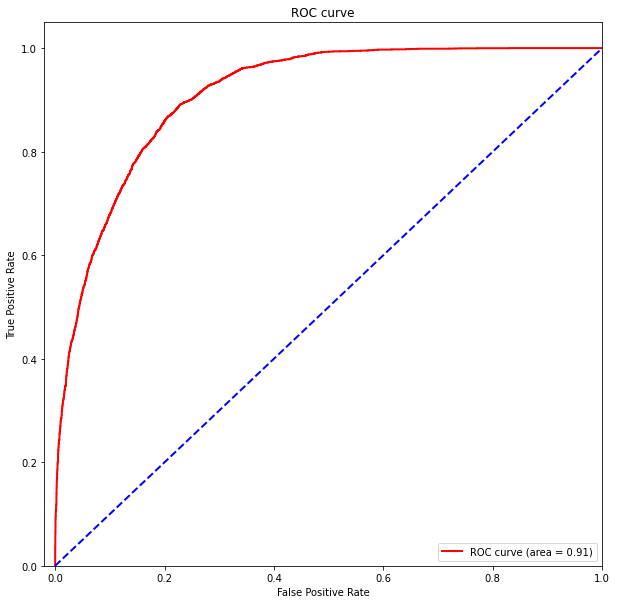

In [16]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

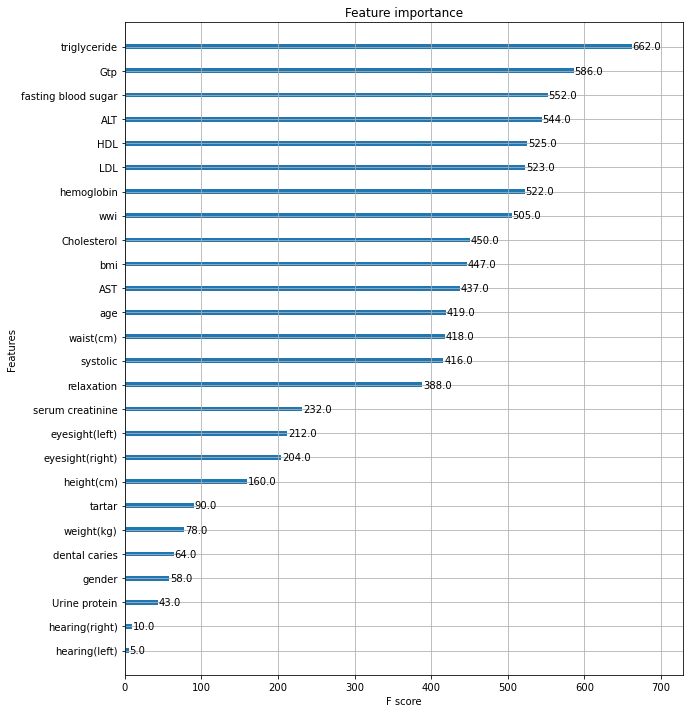

In [17]:
fig, ax = plt.subplots(figsize=(10,12)) # 축 반환
plot_importance(xgb_model,ax=ax)

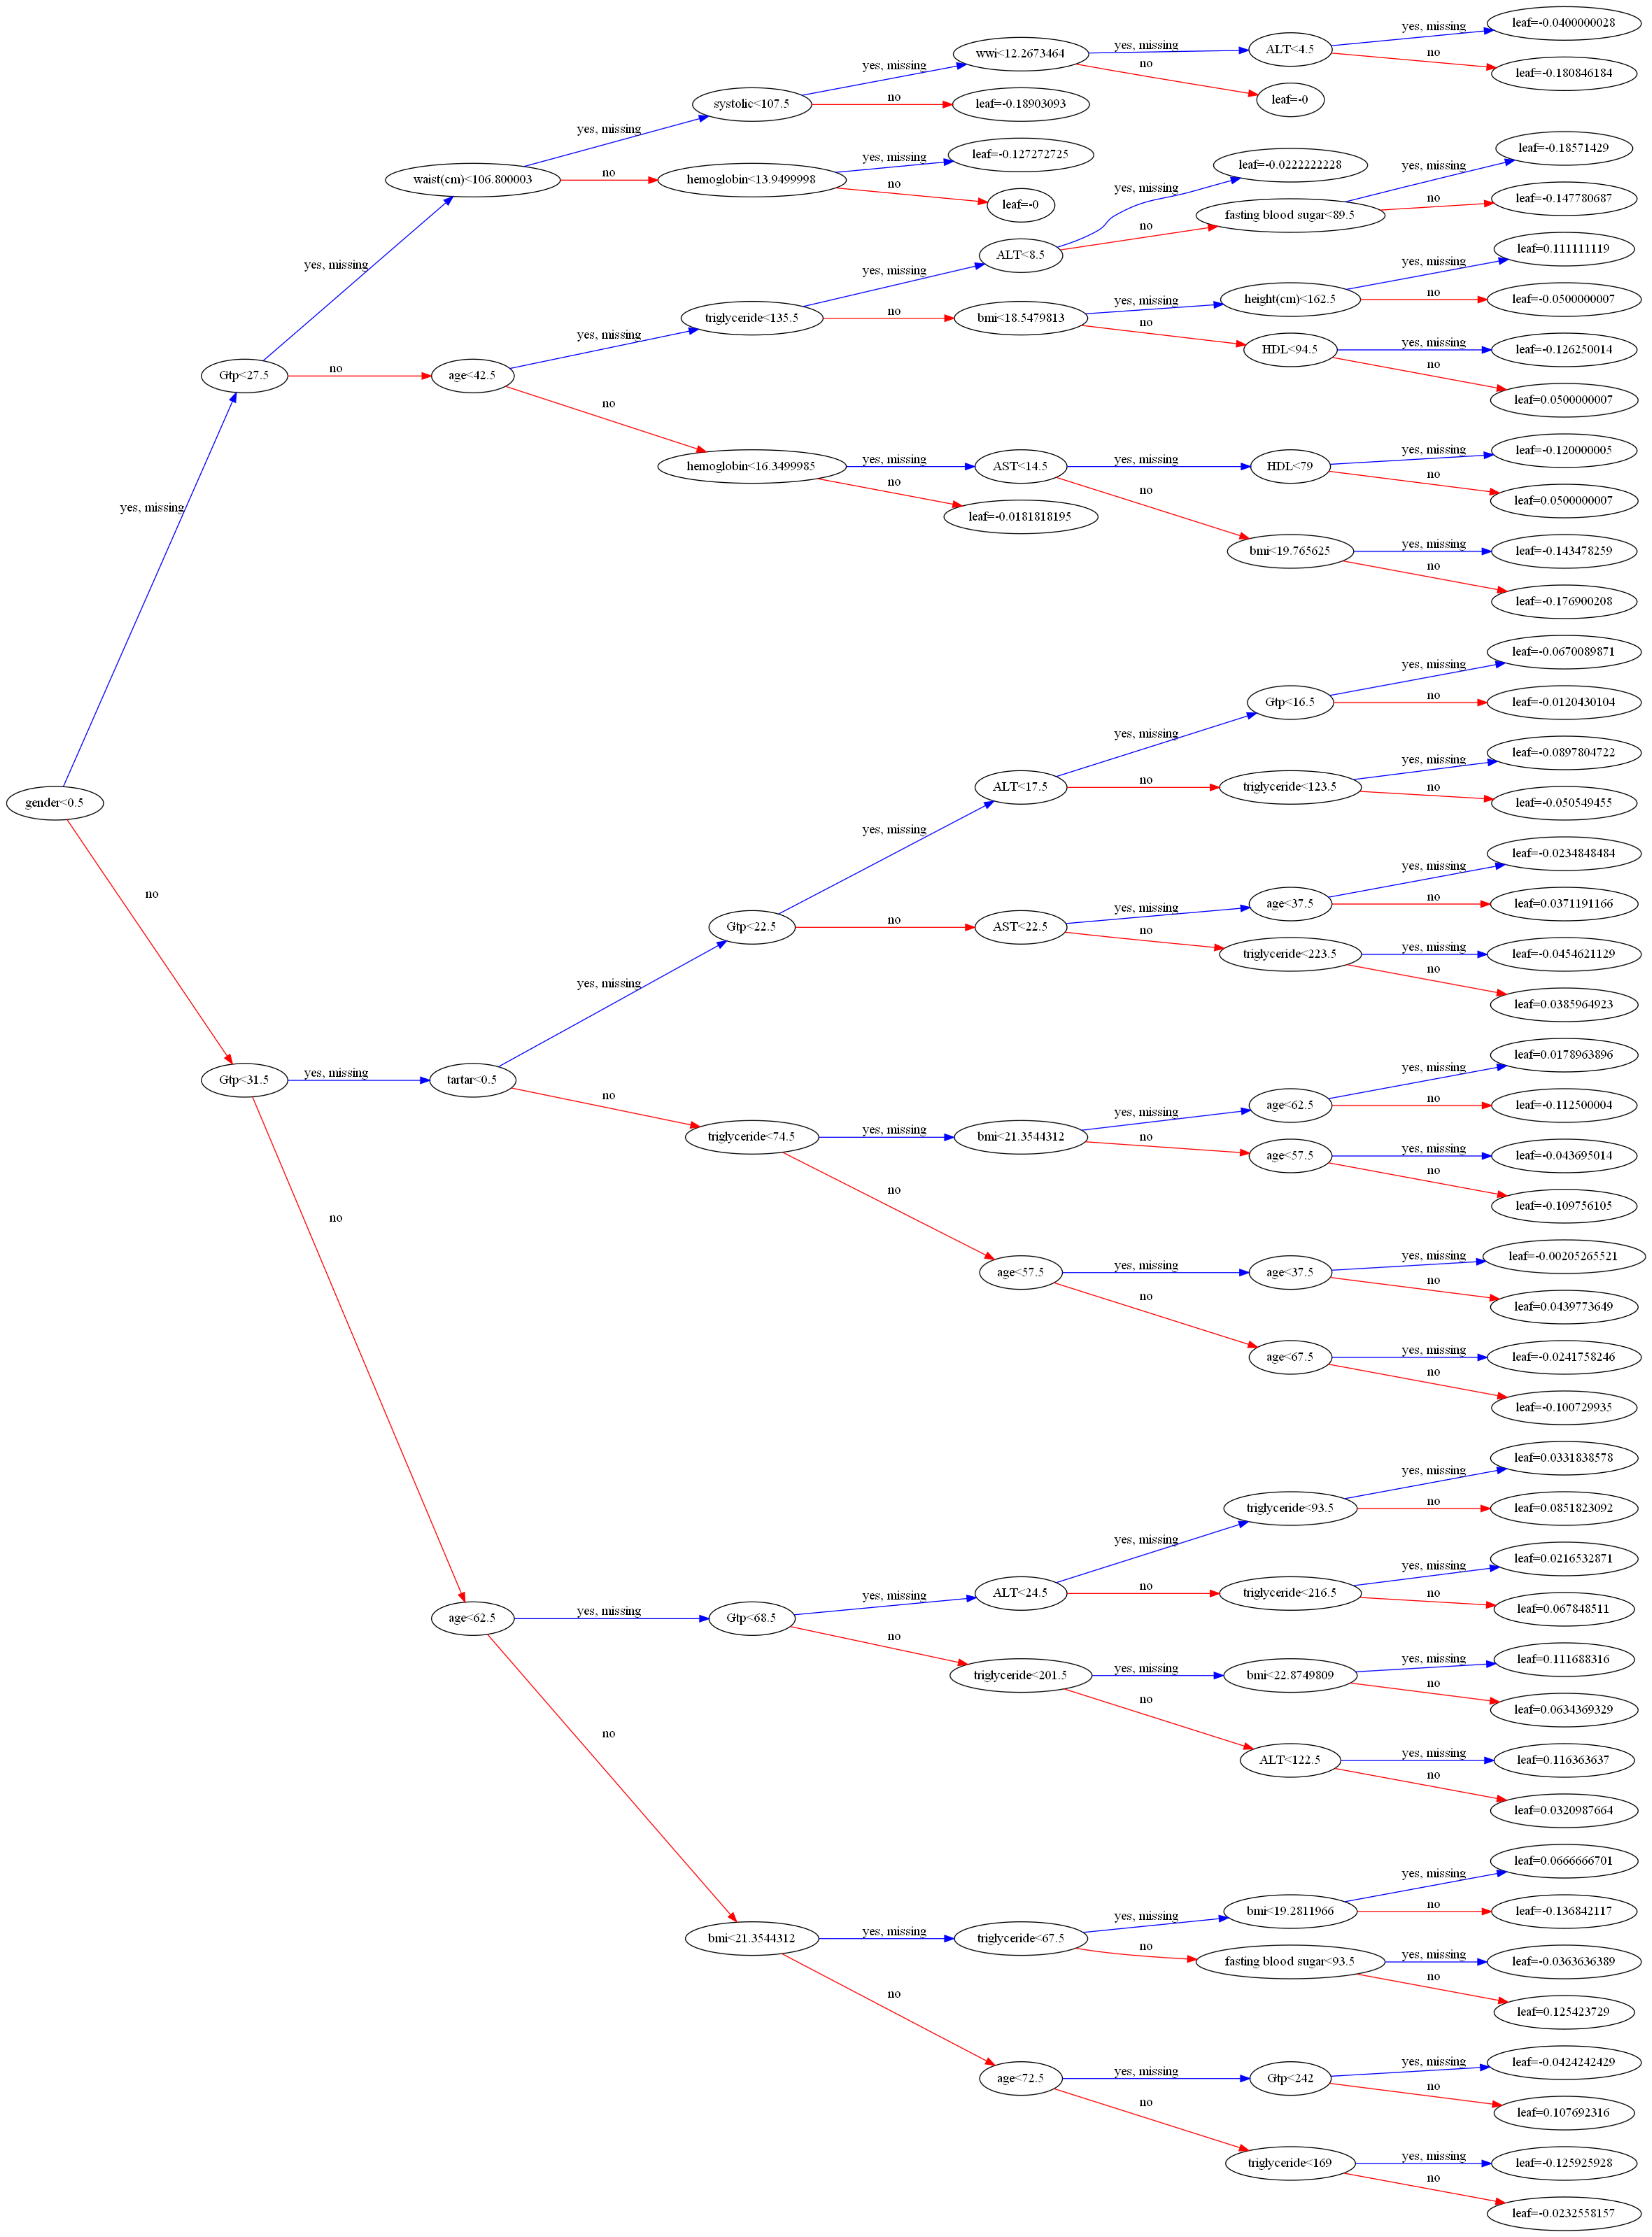

In [18]:
# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('xgb_tree_py_wp.png')

plt.show()

#### num_rounds의 횟수 증가

In [19]:
params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', # 목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, #100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 300 # default : 100

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 4.3 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])


[0]	train-logloss:0.65858	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58567	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52909	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47990	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

[170]	train-logloss:0.38282	eval-logloss:0.38170
[171]	train-logloss:0.38248	eval-logloss:0.38130
[172]	train-logloss:0.38230	eval-logloss:0.38106
[173]	train-logloss:0.38226	eval-logloss:0.38103
[174]	train-logloss:0.38190	eval-logloss:0.38074
[175]	train-logloss:0.38166	eval-logloss:0.38057
[176]	train-logloss:0.38155	eval-logloss:0.38046
[177]	train-logloss:0.38143	eval-logloss:0.38036
[178]	train-logloss:0.38085	eval-logloss:0.37987
[179]	train-logloss:0.38042	eval-logloss:0.37953
[180]	train-logloss:0.37999	eval-logloss:0.37909
[181]	train-logloss:0.37969	eval-logloss:0.37883
[182]	train-logloss:0.37911	eval-logloss:0.37815
[183]	train-logloss:0.37909	eval-logloss:0.37813
[184]	train-logloss:0.37894	eval-logloss:0.37797
[185]	train-logloss:0.37881	eval-logloss:0.37786
[186]	train-logloss:0.37859	eval-logloss:0.37762
[187]	train-logloss:0.37850	eval-logloss:0.37750
[188]	train-logloss:0.37838	eval-logloss:0.37739
[189]	train-logloss:0.37793	eval-logloss:0.37685
[190]	train-logloss:

In [20]:
params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', # 목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, # 100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 400 # default : 100

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 5.7 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65858	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58567	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52909	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47990	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

[170]	train-logloss:0.38282	eval-logloss:0.38170
[171]	train-logloss:0.38248	eval-logloss:0.38130
[172]	train-logloss:0.38230	eval-logloss:0.38106
[173]	train-logloss:0.38226	eval-logloss:0.38103
[174]	train-logloss:0.38190	eval-logloss:0.38074
[175]	train-logloss:0.38166	eval-logloss:0.38057
[176]	train-logloss:0.38155	eval-logloss:0.38046
[177]	train-logloss:0.38143	eval-logloss:0.38036
[178]	train-logloss:0.38085	eval-logloss:0.37987
[179]	train-logloss:0.38042	eval-logloss:0.37953
[180]	train-logloss:0.37999	eval-logloss:0.37909
[181]	train-logloss:0.37969	eval-logloss:0.37883
[182]	train-logloss:0.37911	eval-logloss:0.37815
[183]	train-logloss:0.37909	eval-logloss:0.37813
[184]	train-logloss:0.37894	eval-logloss:0.37797
[185]	train-logloss:0.37881	eval-logloss:0.37786
[186]	train-logloss:0.37859	eval-logloss:0.37762
[187]	train-logloss:0.37850	eval-logloss:0.37750
[188]	train-logloss:0.37838	eval-logloss:0.37739
[189]	train-logloss:0.37793	eval-logloss:0.37685
[190]	train-logloss:

[338]	train-logloss:0.34233	eval-logloss:0.34223
[339]	train-logloss:0.34198	eval-logloss:0.34191
[340]	train-logloss:0.34185	eval-logloss:0.34178
[341]	train-logloss:0.34180	eval-logloss:0.34173
[342]	train-logloss:0.34176	eval-logloss:0.34172
[343]	train-logloss:0.34165	eval-logloss:0.34161
[344]	train-logloss:0.34129	eval-logloss:0.34122
[345]	train-logloss:0.34100	eval-logloss:0.34096
[346]	train-logloss:0.34074	eval-logloss:0.34072
[347]	train-logloss:0.34046	eval-logloss:0.34052
[348]	train-logloss:0.34023	eval-logloss:0.34032
[349]	train-logloss:0.33980	eval-logloss:0.33997
[350]	train-logloss:0.33932	eval-logloss:0.33957
[351]	train-logloss:0.33908	eval-logloss:0.33932
[352]	train-logloss:0.33863	eval-logloss:0.33891
[353]	train-logloss:0.33836	eval-logloss:0.33862
[354]	train-logloss:0.33797	eval-logloss:0.33827
[355]	train-logloss:0.33763	eval-logloss:0.33800
[356]	train-logloss:0.33755	eval-logloss:0.33793
[357]	train-logloss:0.33713	eval-logloss:0.33765
[358]	train-logloss:

In [21]:
params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', # 목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, # 100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 500 # default : 100

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 7.2 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65858	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58567	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52909	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47990	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

[170]	train-logloss:0.38282	eval-logloss:0.38170
[171]	train-logloss:0.38248	eval-logloss:0.38130
[172]	train-logloss:0.38230	eval-logloss:0.38106
[173]	train-logloss:0.38226	eval-logloss:0.38103
[174]	train-logloss:0.38190	eval-logloss:0.38074
[175]	train-logloss:0.38166	eval-logloss:0.38057
[176]	train-logloss:0.38155	eval-logloss:0.38046
[177]	train-logloss:0.38143	eval-logloss:0.38036
[178]	train-logloss:0.38085	eval-logloss:0.37987
[179]	train-logloss:0.38042	eval-logloss:0.37953
[180]	train-logloss:0.37999	eval-logloss:0.37909
[181]	train-logloss:0.37969	eval-logloss:0.37883
[182]	train-logloss:0.37911	eval-logloss:0.37815
[183]	train-logloss:0.37909	eval-logloss:0.37813
[184]	train-logloss:0.37894	eval-logloss:0.37797
[185]	train-logloss:0.37881	eval-logloss:0.37786
[186]	train-logloss:0.37859	eval-logloss:0.37762
[187]	train-logloss:0.37850	eval-logloss:0.37750
[188]	train-logloss:0.37838	eval-logloss:0.37739
[189]	train-logloss:0.37793	eval-logloss:0.37685
[190]	train-logloss:

[338]	train-logloss:0.34233	eval-logloss:0.34223
[339]	train-logloss:0.34198	eval-logloss:0.34191
[340]	train-logloss:0.34185	eval-logloss:0.34178
[341]	train-logloss:0.34180	eval-logloss:0.34173
[342]	train-logloss:0.34176	eval-logloss:0.34172
[343]	train-logloss:0.34165	eval-logloss:0.34161
[344]	train-logloss:0.34129	eval-logloss:0.34122
[345]	train-logloss:0.34100	eval-logloss:0.34096
[346]	train-logloss:0.34074	eval-logloss:0.34072
[347]	train-logloss:0.34046	eval-logloss:0.34052
[348]	train-logloss:0.34023	eval-logloss:0.34032
[349]	train-logloss:0.33980	eval-logloss:0.33997
[350]	train-logloss:0.33932	eval-logloss:0.33957
[351]	train-logloss:0.33908	eval-logloss:0.33932
[352]	train-logloss:0.33863	eval-logloss:0.33891
[353]	train-logloss:0.33836	eval-logloss:0.33862
[354]	train-logloss:0.33797	eval-logloss:0.33827
[355]	train-logloss:0.33763	eval-logloss:0.33800
[356]	train-logloss:0.33755	eval-logloss:0.33793
[357]	train-logloss:0.33713	eval-logloss:0.33765
[358]	train-logloss:

In [22]:
params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', # 목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, # 100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 700 # default : 100

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 10.4 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65858	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58567	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52909	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47990	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

[170]	train-logloss:0.38282	eval-logloss:0.38170
[171]	train-logloss:0.38248	eval-logloss:0.38130
[172]	train-logloss:0.38230	eval-logloss:0.38106
[173]	train-logloss:0.38226	eval-logloss:0.38103
[174]	train-logloss:0.38190	eval-logloss:0.38074
[175]	train-logloss:0.38166	eval-logloss:0.38057
[176]	train-logloss:0.38155	eval-logloss:0.38046
[177]	train-logloss:0.38143	eval-logloss:0.38036
[178]	train-logloss:0.38085	eval-logloss:0.37987
[179]	train-logloss:0.38042	eval-logloss:0.37953
[180]	train-logloss:0.37999	eval-logloss:0.37909
[181]	train-logloss:0.37969	eval-logloss:0.37883
[182]	train-logloss:0.37911	eval-logloss:0.37815
[183]	train-logloss:0.37909	eval-logloss:0.37813
[184]	train-logloss:0.37894	eval-logloss:0.37797
[185]	train-logloss:0.37881	eval-logloss:0.37786
[186]	train-logloss:0.37859	eval-logloss:0.37762
[187]	train-logloss:0.37850	eval-logloss:0.37750
[188]	train-logloss:0.37838	eval-logloss:0.37739
[189]	train-logloss:0.37793	eval-logloss:0.37685
[190]	train-logloss:

[338]	train-logloss:0.34233	eval-logloss:0.34223
[339]	train-logloss:0.34198	eval-logloss:0.34191
[340]	train-logloss:0.34185	eval-logloss:0.34178
[341]	train-logloss:0.34180	eval-logloss:0.34173
[342]	train-logloss:0.34176	eval-logloss:0.34172
[343]	train-logloss:0.34165	eval-logloss:0.34161
[344]	train-logloss:0.34129	eval-logloss:0.34122
[345]	train-logloss:0.34100	eval-logloss:0.34096
[346]	train-logloss:0.34074	eval-logloss:0.34072
[347]	train-logloss:0.34046	eval-logloss:0.34052
[348]	train-logloss:0.34023	eval-logloss:0.34032
[349]	train-logloss:0.33980	eval-logloss:0.33997
[350]	train-logloss:0.33932	eval-logloss:0.33957
[351]	train-logloss:0.33908	eval-logloss:0.33932
[352]	train-logloss:0.33863	eval-logloss:0.33891
[353]	train-logloss:0.33836	eval-logloss:0.33862
[354]	train-logloss:0.33797	eval-logloss:0.33827
[355]	train-logloss:0.33763	eval-logloss:0.33800
[356]	train-logloss:0.33755	eval-logloss:0.33793
[357]	train-logloss:0.33713	eval-logloss:0.33765
[358]	train-logloss:

[506]	train-logloss:0.30336	eval-logloss:0.30452
[507]	train-logloss:0.30310	eval-logloss:0.30424
[508]	train-logloss:0.30290	eval-logloss:0.30407
[509]	train-logloss:0.30258	eval-logloss:0.30374
[510]	train-logloss:0.30237	eval-logloss:0.30350
[511]	train-logloss:0.30205	eval-logloss:0.30315
[512]	train-logloss:0.30189	eval-logloss:0.30297
[513]	train-logloss:0.30162	eval-logloss:0.30269
[514]	train-logloss:0.30157	eval-logloss:0.30265
[515]	train-logloss:0.30152	eval-logloss:0.30260
[516]	train-logloss:0.30148	eval-logloss:0.30259
[517]	train-logloss:0.30110	eval-logloss:0.30220
[518]	train-logloss:0.30085	eval-logloss:0.30194
[519]	train-logloss:0.30064	eval-logloss:0.30172
[520]	train-logloss:0.30031	eval-logloss:0.30131
[521]	train-logloss:0.30003	eval-logloss:0.30098
[522]	train-logloss:0.29966	eval-logloss:0.30060
[523]	train-logloss:0.29946	eval-logloss:0.30046
[524]	train-logloss:0.29924	eval-logloss:0.30020
[525]	train-logloss:0.29892	eval-logloss:0.29988
[526]	train-logloss:

[674]	train-logloss:0.27055	eval-logloss:0.27204
[675]	train-logloss:0.27033	eval-logloss:0.27186
[676]	train-logloss:0.27030	eval-logloss:0.27183
[677]	train-logloss:0.27011	eval-logloss:0.27162
[678]	train-logloss:0.26972	eval-logloss:0.27122
[679]	train-logloss:0.26939	eval-logloss:0.27083
[680]	train-logloss:0.26926	eval-logloss:0.27071
[681]	train-logloss:0.26913	eval-logloss:0.27058
[682]	train-logloss:0.26881	eval-logloss:0.27022
[683]	train-logloss:0.26858	eval-logloss:0.26999
[684]	train-logloss:0.26846	eval-logloss:0.26990
[685]	train-logloss:0.26826	eval-logloss:0.26972
[686]	train-logloss:0.26810	eval-logloss:0.26954
[687]	train-logloss:0.26800	eval-logloss:0.26945
[688]	train-logloss:0.26793	eval-logloss:0.26937
[689]	train-logloss:0.26783	eval-logloss:0.26926
[690]	train-logloss:0.26754	eval-logloss:0.26899
[691]	train-logloss:0.26731	eval-logloss:0.26874
[692]	train-logloss:0.26708	eval-logloss:0.26854
[693]	train-logloss:0.26686	eval-logloss:0.26831
[694]	train-logloss:

In [23]:
params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', #목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, #100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 1000 # default : 100

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 15.3 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65858	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58567	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52909	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47990	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

[170]	train-logloss:0.38282	eval-logloss:0.38170
[171]	train-logloss:0.38248	eval-logloss:0.38130
[172]	train-logloss:0.38230	eval-logloss:0.38106
[173]	train-logloss:0.38226	eval-logloss:0.38103
[174]	train-logloss:0.38190	eval-logloss:0.38074
[175]	train-logloss:0.38166	eval-logloss:0.38057
[176]	train-logloss:0.38155	eval-logloss:0.38046
[177]	train-logloss:0.38143	eval-logloss:0.38036
[178]	train-logloss:0.38085	eval-logloss:0.37987
[179]	train-logloss:0.38042	eval-logloss:0.37953
[180]	train-logloss:0.37999	eval-logloss:0.37909
[181]	train-logloss:0.37969	eval-logloss:0.37883
[182]	train-logloss:0.37911	eval-logloss:0.37815
[183]	train-logloss:0.37909	eval-logloss:0.37813
[184]	train-logloss:0.37894	eval-logloss:0.37797
[185]	train-logloss:0.37881	eval-logloss:0.37786
[186]	train-logloss:0.37859	eval-logloss:0.37762
[187]	train-logloss:0.37850	eval-logloss:0.37750
[188]	train-logloss:0.37838	eval-logloss:0.37739
[189]	train-logloss:0.37793	eval-logloss:0.37685
[190]	train-logloss:

[338]	train-logloss:0.34233	eval-logloss:0.34223
[339]	train-logloss:0.34198	eval-logloss:0.34191
[340]	train-logloss:0.34185	eval-logloss:0.34178
[341]	train-logloss:0.34180	eval-logloss:0.34173
[342]	train-logloss:0.34176	eval-logloss:0.34172
[343]	train-logloss:0.34165	eval-logloss:0.34161
[344]	train-logloss:0.34129	eval-logloss:0.34122
[345]	train-logloss:0.34100	eval-logloss:0.34096
[346]	train-logloss:0.34074	eval-logloss:0.34072
[347]	train-logloss:0.34046	eval-logloss:0.34052
[348]	train-logloss:0.34023	eval-logloss:0.34032
[349]	train-logloss:0.33980	eval-logloss:0.33997
[350]	train-logloss:0.33932	eval-logloss:0.33957
[351]	train-logloss:0.33908	eval-logloss:0.33932
[352]	train-logloss:0.33863	eval-logloss:0.33891
[353]	train-logloss:0.33836	eval-logloss:0.33862
[354]	train-logloss:0.33797	eval-logloss:0.33827
[355]	train-logloss:0.33763	eval-logloss:0.33800
[356]	train-logloss:0.33755	eval-logloss:0.33793
[357]	train-logloss:0.33713	eval-logloss:0.33765
[358]	train-logloss:

[506]	train-logloss:0.30336	eval-logloss:0.30452
[507]	train-logloss:0.30310	eval-logloss:0.30424
[508]	train-logloss:0.30290	eval-logloss:0.30407
[509]	train-logloss:0.30258	eval-logloss:0.30374
[510]	train-logloss:0.30237	eval-logloss:0.30350
[511]	train-logloss:0.30205	eval-logloss:0.30315
[512]	train-logloss:0.30189	eval-logloss:0.30297
[513]	train-logloss:0.30162	eval-logloss:0.30269
[514]	train-logloss:0.30157	eval-logloss:0.30265
[515]	train-logloss:0.30152	eval-logloss:0.30260
[516]	train-logloss:0.30148	eval-logloss:0.30259
[517]	train-logloss:0.30110	eval-logloss:0.30220
[518]	train-logloss:0.30085	eval-logloss:0.30194
[519]	train-logloss:0.30064	eval-logloss:0.30172
[520]	train-logloss:0.30031	eval-logloss:0.30131
[521]	train-logloss:0.30003	eval-logloss:0.30098
[522]	train-logloss:0.29966	eval-logloss:0.30060
[523]	train-logloss:0.29946	eval-logloss:0.30046
[524]	train-logloss:0.29924	eval-logloss:0.30020
[525]	train-logloss:0.29892	eval-logloss:0.29988
[526]	train-logloss:

[674]	train-logloss:0.27055	eval-logloss:0.27204
[675]	train-logloss:0.27033	eval-logloss:0.27186
[676]	train-logloss:0.27030	eval-logloss:0.27183
[677]	train-logloss:0.27011	eval-logloss:0.27162
[678]	train-logloss:0.26972	eval-logloss:0.27122
[679]	train-logloss:0.26939	eval-logloss:0.27083
[680]	train-logloss:0.26926	eval-logloss:0.27071
[681]	train-logloss:0.26913	eval-logloss:0.27058
[682]	train-logloss:0.26881	eval-logloss:0.27022
[683]	train-logloss:0.26858	eval-logloss:0.26999
[684]	train-logloss:0.26846	eval-logloss:0.26990
[685]	train-logloss:0.26826	eval-logloss:0.26972
[686]	train-logloss:0.26810	eval-logloss:0.26954
[687]	train-logloss:0.26800	eval-logloss:0.26945
[688]	train-logloss:0.26793	eval-logloss:0.26937
[689]	train-logloss:0.26783	eval-logloss:0.26926
[690]	train-logloss:0.26754	eval-logloss:0.26899
[691]	train-logloss:0.26731	eval-logloss:0.26874
[692]	train-logloss:0.26708	eval-logloss:0.26854
[693]	train-logloss:0.26686	eval-logloss:0.26831
[694]	train-logloss:

[842]	train-logloss:0.24132	eval-logloss:0.24315
[843]	train-logloss:0.24113	eval-logloss:0.24298
[844]	train-logloss:0.24091	eval-logloss:0.24279
[845]	train-logloss:0.24087	eval-logloss:0.24273
[846]	train-logloss:0.24074	eval-logloss:0.24262
[847]	train-logloss:0.24062	eval-logloss:0.24252
[848]	train-logloss:0.24030	eval-logloss:0.24224
[849]	train-logloss:0.24003	eval-logloss:0.24199
[850]	train-logloss:0.23983	eval-logloss:0.24176
[851]	train-logloss:0.23959	eval-logloss:0.24151
[852]	train-logloss:0.23941	eval-logloss:0.24130
[853]	train-logloss:0.23918	eval-logloss:0.24104
[854]	train-logloss:0.23900	eval-logloss:0.24086
[855]	train-logloss:0.23884	eval-logloss:0.24075
[856]	train-logloss:0.23878	eval-logloss:0.24070
[857]	train-logloss:0.23863	eval-logloss:0.24055
[858]	train-logloss:0.23847	eval-logloss:0.24037
[859]	train-logloss:0.23822	eval-logloss:0.24011
[860]	train-logloss:0.23813	eval-logloss:0.24003
[861]	train-logloss:0.23785	eval-logloss:0.23976
[862]	train-logloss:

In [24]:
params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', #목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, #100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 2000 # default : 100

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params,dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 5.4 sec
pred_probs = xgb_model.predict(dtest)
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,preds)))

# 평가지표 시각화 : 오차행렬
print(get_clf_eval(y_test, preds, pred_probs))
xgb_check.append([num_rounds, accuracy_score(y_test,preds), precision_score(y_test,preds), recall_score(y_test,preds), f1_score(y_test,preds), roc_auc_score(y_test,pred_probs)])

[0]	train-logloss:0.65858	eval-logloss:0.65794
[1]	train-logloss:0.62994	eval-logloss:0.62888
[2]	train-logloss:0.60586	eval-logloss:0.60428
[3]	train-logloss:0.58567	eval-logloss:0.58370
[4]	train-logloss:0.56833	eval-logloss:0.56601
[5]	train-logloss:0.55341	eval-logloss:0.55083
[6]	train-logloss:0.54039	eval-logloss:0.53766
[7]	train-logloss:0.52909	eval-logloss:0.52611
[8]	train-logloss:0.51928	eval-logloss:0.51616
[9]	train-logloss:0.51068	eval-logloss:0.50736
[10]	train-logloss:0.50292	eval-logloss:0.49941
[11]	train-logloss:0.49610	eval-logloss:0.49251
[12]	train-logloss:0.49021	eval-logloss:0.48650
[13]	train-logloss:0.48484	eval-logloss:0.48110
[14]	train-logloss:0.47990	eval-logloss:0.47604
[15]	train-logloss:0.47556	eval-logloss:0.47157
[16]	train-logloss:0.47179	eval-logloss:0.46773
[17]	train-logloss:0.46828	eval-logloss:0.46418
[18]	train-logloss:0.46507	eval-logloss:0.46094
[19]	train-logloss:0.46214	eval-logloss:0.45802
[20]	train-logloss:0.45948	eval-logloss:0.45532
[2

[170]	train-logloss:0.38282	eval-logloss:0.38170
[171]	train-logloss:0.38248	eval-logloss:0.38130
[172]	train-logloss:0.38230	eval-logloss:0.38106
[173]	train-logloss:0.38226	eval-logloss:0.38103
[174]	train-logloss:0.38190	eval-logloss:0.38074
[175]	train-logloss:0.38166	eval-logloss:0.38057
[176]	train-logloss:0.38155	eval-logloss:0.38046
[177]	train-logloss:0.38143	eval-logloss:0.38036
[178]	train-logloss:0.38085	eval-logloss:0.37987
[179]	train-logloss:0.38042	eval-logloss:0.37953
[180]	train-logloss:0.37999	eval-logloss:0.37909
[181]	train-logloss:0.37969	eval-logloss:0.37883
[182]	train-logloss:0.37911	eval-logloss:0.37815
[183]	train-logloss:0.37909	eval-logloss:0.37813
[184]	train-logloss:0.37894	eval-logloss:0.37797
[185]	train-logloss:0.37881	eval-logloss:0.37786
[186]	train-logloss:0.37859	eval-logloss:0.37762
[187]	train-logloss:0.37850	eval-logloss:0.37750
[188]	train-logloss:0.37838	eval-logloss:0.37739
[189]	train-logloss:0.37793	eval-logloss:0.37685
[190]	train-logloss:

[338]	train-logloss:0.34233	eval-logloss:0.34223
[339]	train-logloss:0.34198	eval-logloss:0.34191
[340]	train-logloss:0.34185	eval-logloss:0.34178
[341]	train-logloss:0.34180	eval-logloss:0.34173
[342]	train-logloss:0.34176	eval-logloss:0.34172
[343]	train-logloss:0.34165	eval-logloss:0.34161
[344]	train-logloss:0.34129	eval-logloss:0.34122
[345]	train-logloss:0.34100	eval-logloss:0.34096
[346]	train-logloss:0.34074	eval-logloss:0.34072
[347]	train-logloss:0.34046	eval-logloss:0.34052
[348]	train-logloss:0.34023	eval-logloss:0.34032
[349]	train-logloss:0.33980	eval-logloss:0.33997
[350]	train-logloss:0.33932	eval-logloss:0.33957
[351]	train-logloss:0.33908	eval-logloss:0.33932
[352]	train-logloss:0.33863	eval-logloss:0.33891
[353]	train-logloss:0.33836	eval-logloss:0.33862
[354]	train-logloss:0.33797	eval-logloss:0.33827
[355]	train-logloss:0.33763	eval-logloss:0.33800
[356]	train-logloss:0.33755	eval-logloss:0.33793
[357]	train-logloss:0.33713	eval-logloss:0.33765
[358]	train-logloss:

[506]	train-logloss:0.30336	eval-logloss:0.30452
[507]	train-logloss:0.30310	eval-logloss:0.30424
[508]	train-logloss:0.30290	eval-logloss:0.30407
[509]	train-logloss:0.30258	eval-logloss:0.30374
[510]	train-logloss:0.30237	eval-logloss:0.30350
[511]	train-logloss:0.30205	eval-logloss:0.30315
[512]	train-logloss:0.30189	eval-logloss:0.30297
[513]	train-logloss:0.30162	eval-logloss:0.30269
[514]	train-logloss:0.30157	eval-logloss:0.30265
[515]	train-logloss:0.30152	eval-logloss:0.30260
[516]	train-logloss:0.30148	eval-logloss:0.30259
[517]	train-logloss:0.30110	eval-logloss:0.30220
[518]	train-logloss:0.30085	eval-logloss:0.30194
[519]	train-logloss:0.30064	eval-logloss:0.30172
[520]	train-logloss:0.30031	eval-logloss:0.30131
[521]	train-logloss:0.30003	eval-logloss:0.30098
[522]	train-logloss:0.29966	eval-logloss:0.30060
[523]	train-logloss:0.29946	eval-logloss:0.30046
[524]	train-logloss:0.29924	eval-logloss:0.30020
[525]	train-logloss:0.29892	eval-logloss:0.29988
[526]	train-logloss:

[674]	train-logloss:0.27055	eval-logloss:0.27204
[675]	train-logloss:0.27033	eval-logloss:0.27186
[676]	train-logloss:0.27030	eval-logloss:0.27183
[677]	train-logloss:0.27011	eval-logloss:0.27162
[678]	train-logloss:0.26972	eval-logloss:0.27122
[679]	train-logloss:0.26939	eval-logloss:0.27083
[680]	train-logloss:0.26926	eval-logloss:0.27071
[681]	train-logloss:0.26913	eval-logloss:0.27058
[682]	train-logloss:0.26881	eval-logloss:0.27022
[683]	train-logloss:0.26858	eval-logloss:0.26999
[684]	train-logloss:0.26846	eval-logloss:0.26990
[685]	train-logloss:0.26826	eval-logloss:0.26972
[686]	train-logloss:0.26810	eval-logloss:0.26954
[687]	train-logloss:0.26800	eval-logloss:0.26945
[688]	train-logloss:0.26793	eval-logloss:0.26937
[689]	train-logloss:0.26783	eval-logloss:0.26926
[690]	train-logloss:0.26754	eval-logloss:0.26899
[691]	train-logloss:0.26731	eval-logloss:0.26874
[692]	train-logloss:0.26708	eval-logloss:0.26854
[693]	train-logloss:0.26686	eval-logloss:0.26831
[694]	train-logloss:

[842]	train-logloss:0.24132	eval-logloss:0.24315
[843]	train-logloss:0.24113	eval-logloss:0.24298
[844]	train-logloss:0.24091	eval-logloss:0.24279
[845]	train-logloss:0.24087	eval-logloss:0.24273
[846]	train-logloss:0.24074	eval-logloss:0.24262
[847]	train-logloss:0.24062	eval-logloss:0.24252
[848]	train-logloss:0.24030	eval-logloss:0.24224
[849]	train-logloss:0.24003	eval-logloss:0.24199
[850]	train-logloss:0.23983	eval-logloss:0.24176
[851]	train-logloss:0.23959	eval-logloss:0.24151
[852]	train-logloss:0.23941	eval-logloss:0.24130
[853]	train-logloss:0.23918	eval-logloss:0.24104
[854]	train-logloss:0.23900	eval-logloss:0.24086
[855]	train-logloss:0.23884	eval-logloss:0.24075
[856]	train-logloss:0.23878	eval-logloss:0.24070
[857]	train-logloss:0.23863	eval-logloss:0.24055
[858]	train-logloss:0.23847	eval-logloss:0.24037
[859]	train-logloss:0.23822	eval-logloss:0.24011
[860]	train-logloss:0.23813	eval-logloss:0.24003
[861]	train-logloss:0.23785	eval-logloss:0.23976
[862]	train-logloss:

[1010]	train-logloss:0.21431	eval-logloss:0.21664
[1011]	train-logloss:0.21421	eval-logloss:0.21653
[1012]	train-logloss:0.21401	eval-logloss:0.21627
[1013]	train-logloss:0.21379	eval-logloss:0.21608
[1014]	train-logloss:0.21359	eval-logloss:0.21589
[1015]	train-logloss:0.21347	eval-logloss:0.21576
[1016]	train-logloss:0.21331	eval-logloss:0.21558
[1017]	train-logloss:0.21320	eval-logloss:0.21550
[1018]	train-logloss:0.21319	eval-logloss:0.21549
[1019]	train-logloss:0.21311	eval-logloss:0.21541
[1020]	train-logloss:0.21294	eval-logloss:0.21524
[1021]	train-logloss:0.21277	eval-logloss:0.21507
[1022]	train-logloss:0.21261	eval-logloss:0.21490
[1023]	train-logloss:0.21252	eval-logloss:0.21479
[1024]	train-logloss:0.21241	eval-logloss:0.21466
[1025]	train-logloss:0.21224	eval-logloss:0.21450
[1026]	train-logloss:0.21214	eval-logloss:0.21440
[1027]	train-logloss:0.21198	eval-logloss:0.21423
[1028]	train-logloss:0.21196	eval-logloss:0.21421
[1029]	train-logloss:0.21191	eval-logloss:0.21416


[1174]	train-logloss:0.19308	eval-logloss:0.19514
[1175]	train-logloss:0.19303	eval-logloss:0.19509
[1176]	train-logloss:0.19288	eval-logloss:0.19493
[1177]	train-logloss:0.19270	eval-logloss:0.19473
[1178]	train-logloss:0.19259	eval-logloss:0.19462
[1179]	train-logloss:0.19235	eval-logloss:0.19431
[1180]	train-logloss:0.19221	eval-logloss:0.19419
[1181]	train-logloss:0.19210	eval-logloss:0.19407
[1182]	train-logloss:0.19190	eval-logloss:0.19384
[1183]	train-logloss:0.19181	eval-logloss:0.19375
[1184]	train-logloss:0.19160	eval-logloss:0.19360
[1185]	train-logloss:0.19148	eval-logloss:0.19345
[1186]	train-logloss:0.19144	eval-logloss:0.19341
[1187]	train-logloss:0.19129	eval-logloss:0.19328
[1188]	train-logloss:0.19124	eval-logloss:0.19321
[1189]	train-logloss:0.19101	eval-logloss:0.19300
[1190]	train-logloss:0.19084	eval-logloss:0.19283
[1191]	train-logloss:0.19070	eval-logloss:0.19269
[1192]	train-logloss:0.19062	eval-logloss:0.19262
[1193]	train-logloss:0.19039	eval-logloss:0.19242


[1338]	train-logloss:0.17602	eval-logloss:0.17815
[1339]	train-logloss:0.17599	eval-logloss:0.17812
[1340]	train-logloss:0.17597	eval-logloss:0.17810
[1341]	train-logloss:0.17592	eval-logloss:0.17806
[1342]	train-logloss:0.17591	eval-logloss:0.17804
[1343]	train-logloss:0.17584	eval-logloss:0.17797
[1344]	train-logloss:0.17573	eval-logloss:0.17785
[1345]	train-logloss:0.17559	eval-logloss:0.17770
[1346]	train-logloss:0.17551	eval-logloss:0.17759
[1347]	train-logloss:0.17540	eval-logloss:0.17746
[1348]	train-logloss:0.17533	eval-logloss:0.17739
[1349]	train-logloss:0.17530	eval-logloss:0.17736
[1350]	train-logloss:0.17528	eval-logloss:0.17733
[1351]	train-logloss:0.17525	eval-logloss:0.17730
[1352]	train-logloss:0.17522	eval-logloss:0.17727
[1353]	train-logloss:0.17520	eval-logloss:0.17724
[1354]	train-logloss:0.17510	eval-logloss:0.17713
[1355]	train-logloss:0.17498	eval-logloss:0.17700
[1356]	train-logloss:0.17494	eval-logloss:0.17695
[1357]	train-logloss:0.17486	eval-logloss:0.17688


[1502]	train-logloss:0.15804	eval-logloss:0.16011
[1503]	train-logloss:0.15800	eval-logloss:0.16007
[1504]	train-logloss:0.15797	eval-logloss:0.16004
[1505]	train-logloss:0.15790	eval-logloss:0.15999
[1506]	train-logloss:0.15780	eval-logloss:0.15989
[1507]	train-logloss:0.15774	eval-logloss:0.15983
[1508]	train-logloss:0.15765	eval-logloss:0.15975
[1509]	train-logloss:0.15754	eval-logloss:0.15963
[1510]	train-logloss:0.15744	eval-logloss:0.15954
[1511]	train-logloss:0.15729	eval-logloss:0.15941
[1512]	train-logloss:0.15718	eval-logloss:0.15930
[1513]	train-logloss:0.15709	eval-logloss:0.15921
[1514]	train-logloss:0.15703	eval-logloss:0.15914
[1515]	train-logloss:0.15689	eval-logloss:0.15900
[1516]	train-logloss:0.15668	eval-logloss:0.15877
[1517]	train-logloss:0.15649	eval-logloss:0.15858
[1518]	train-logloss:0.15634	eval-logloss:0.15840
[1519]	train-logloss:0.15626	eval-logloss:0.15830
[1520]	train-logloss:0.15623	eval-logloss:0.15826
[1521]	train-logloss:0.15605	eval-logloss:0.15804


[1666]	train-logloss:0.14274	eval-logloss:0.14475
[1667]	train-logloss:0.14260	eval-logloss:0.14465
[1668]	train-logloss:0.14257	eval-logloss:0.14462
[1669]	train-logloss:0.14255	eval-logloss:0.14460
[1670]	train-logloss:0.14253	eval-logloss:0.14458
[1671]	train-logloss:0.14247	eval-logloss:0.14452
[1672]	train-logloss:0.14246	eval-logloss:0.14451
[1673]	train-logloss:0.14243	eval-logloss:0.14449
[1674]	train-logloss:0.14234	eval-logloss:0.14439
[1675]	train-logloss:0.14218	eval-logloss:0.14420
[1676]	train-logloss:0.14203	eval-logloss:0.14404
[1677]	train-logloss:0.14192	eval-logloss:0.14394
[1678]	train-logloss:0.14186	eval-logloss:0.14389
[1679]	train-logloss:0.14180	eval-logloss:0.14385
[1680]	train-logloss:0.14169	eval-logloss:0.14374
[1681]	train-logloss:0.14168	eval-logloss:0.14372
[1682]	train-logloss:0.14164	eval-logloss:0.14367
[1683]	train-logloss:0.14155	eval-logloss:0.14359
[1684]	train-logloss:0.14154	eval-logloss:0.14358
[1685]	train-logloss:0.14141	eval-logloss:0.14344


[1830]	train-logloss:0.12802	eval-logloss:0.12998
[1831]	train-logloss:0.12792	eval-logloss:0.12986
[1832]	train-logloss:0.12789	eval-logloss:0.12984
[1833]	train-logloss:0.12786	eval-logloss:0.12981
[1834]	train-logloss:0.12781	eval-logloss:0.12976
[1835]	train-logloss:0.12770	eval-logloss:0.12962
[1836]	train-logloss:0.12760	eval-logloss:0.12953
[1837]	train-logloss:0.12749	eval-logloss:0.12942
[1838]	train-logloss:0.12740	eval-logloss:0.12933
[1839]	train-logloss:0.12733	eval-logloss:0.12926
[1840]	train-logloss:0.12727	eval-logloss:0.12919
[1841]	train-logloss:0.12715	eval-logloss:0.12906
[1842]	train-logloss:0.12713	eval-logloss:0.12904
[1843]	train-logloss:0.12709	eval-logloss:0.12901
[1844]	train-logloss:0.12697	eval-logloss:0.12890
[1845]	train-logloss:0.12686	eval-logloss:0.12878
[1846]	train-logloss:0.12677	eval-logloss:0.12869
[1847]	train-logloss:0.12670	eval-logloss:0.12865
[1848]	train-logloss:0.12669	eval-logloss:0.12862
[1849]	train-logloss:0.12664	eval-logloss:0.12858


[1994]	train-logloss:0.11667	eval-logloss:0.11853
[1995]	train-logloss:0.11664	eval-logloss:0.11850
[1996]	train-logloss:0.11662	eval-logloss:0.11848
[1997]	train-logloss:0.11658	eval-logloss:0.11844
[1998]	train-logloss:0.11643	eval-logloss:0.11828
[1999]	train-logloss:0.11626	eval-logloss:0.11810
XGB 수행 시간: 31.0 초 
분류 결과 : 1.0 
오차 행렬
[[6981   55]
 [  60 4043]]
정확도: 0.9897, 정밀도: 0.9866, 재현율: 0.9854,    F1: 0.9860, AUC:0.9994
None


In [25]:
pd.DataFrame(xgb_check, columns=['num_rounds','accuracy','precision','recall','f1_score','AUC'])

num_rounds  accuracy  precision    recall  f1_score       AUC
0         200  0.826645   0.753620  0.786498  0.769708  0.911025
1         300  0.847563   0.782742  0.811358  0.796793  0.928907
2         400  0.867672   0.810097  0.836949  0.823304  0.942742
3         500  0.884011   0.832191  0.858153  0.844972  0.954566
4         700  0.913098   0.875449  0.890812  0.883064  0.972402
5        1000  0.946135   0.921135  0.933707  0.927378  0.987968
6        2000  0.989676   0.986579  0.985377  0.985977  0.999441

### 2.2 Scikit-leran wrapper를 사용한 XGB 모델

#### 2.2.1 분류기 생성

In [95]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# Train the model
start = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=1000, # n_estimators를 1000으로 설정
                        max_depth=3,
                        silent=False,
                        objective='binary:logistic',
                        booster='gbtree',
                        n_jobs=1,
                        nthread=None,
                        gamma=0).fit(x_train,y_train)
# Make prediction
xgb_pred = xgb_clf.predict(x_test)
# Get predicted probability
xgb_pred_probs = xgb_clf.predict_proba(x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 23.2 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,xgb_pred)))

XGB 수행 시간: 23.2 초 
분류 결과 : 0.8 


#### 2.2.2 평가지표 시각화 : 오차행렬, ROC curve

In [96]:
get_clf_eval(y_test, xgb_pred, xgb_pred_probs)

오차 행렬
[[5892 1144]
 [1001 3102]]
정확도: 0.8074, 정밀도: 0.7306, 재현율: 0.7560,    F1: 0.7431, AUC:0.8908


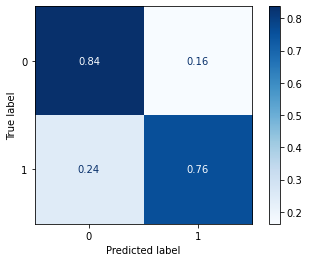

In [97]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf, x_test, y_test, cmap = plt.cm.Blues, normalize = "true")

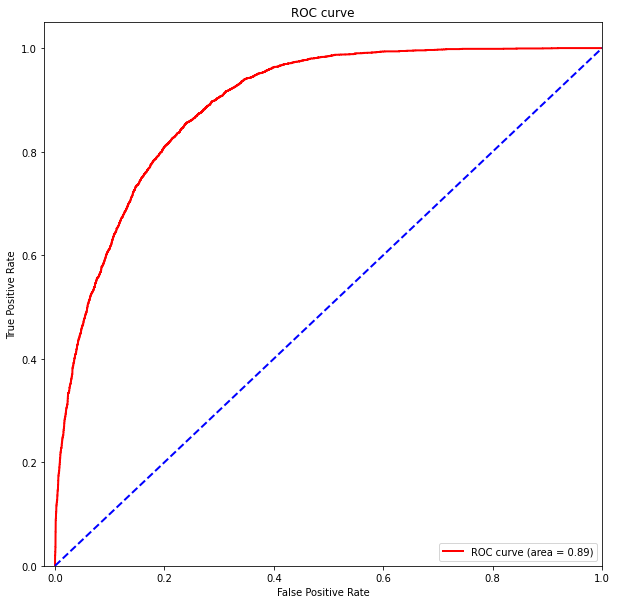

In [98]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

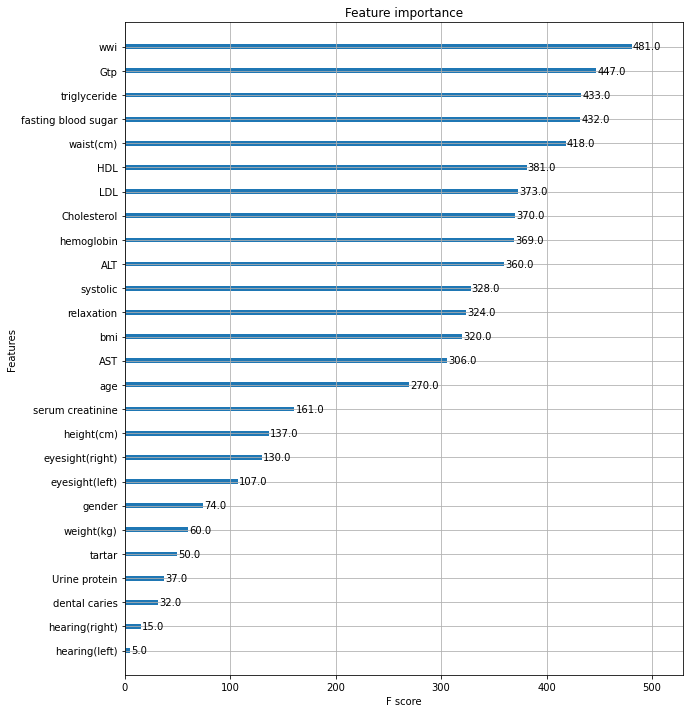

In [99]:
fig, ax = plt.subplots(figsize=(10,12)) # 축 반환
plot_importance(xgb_clf,ax=ax)

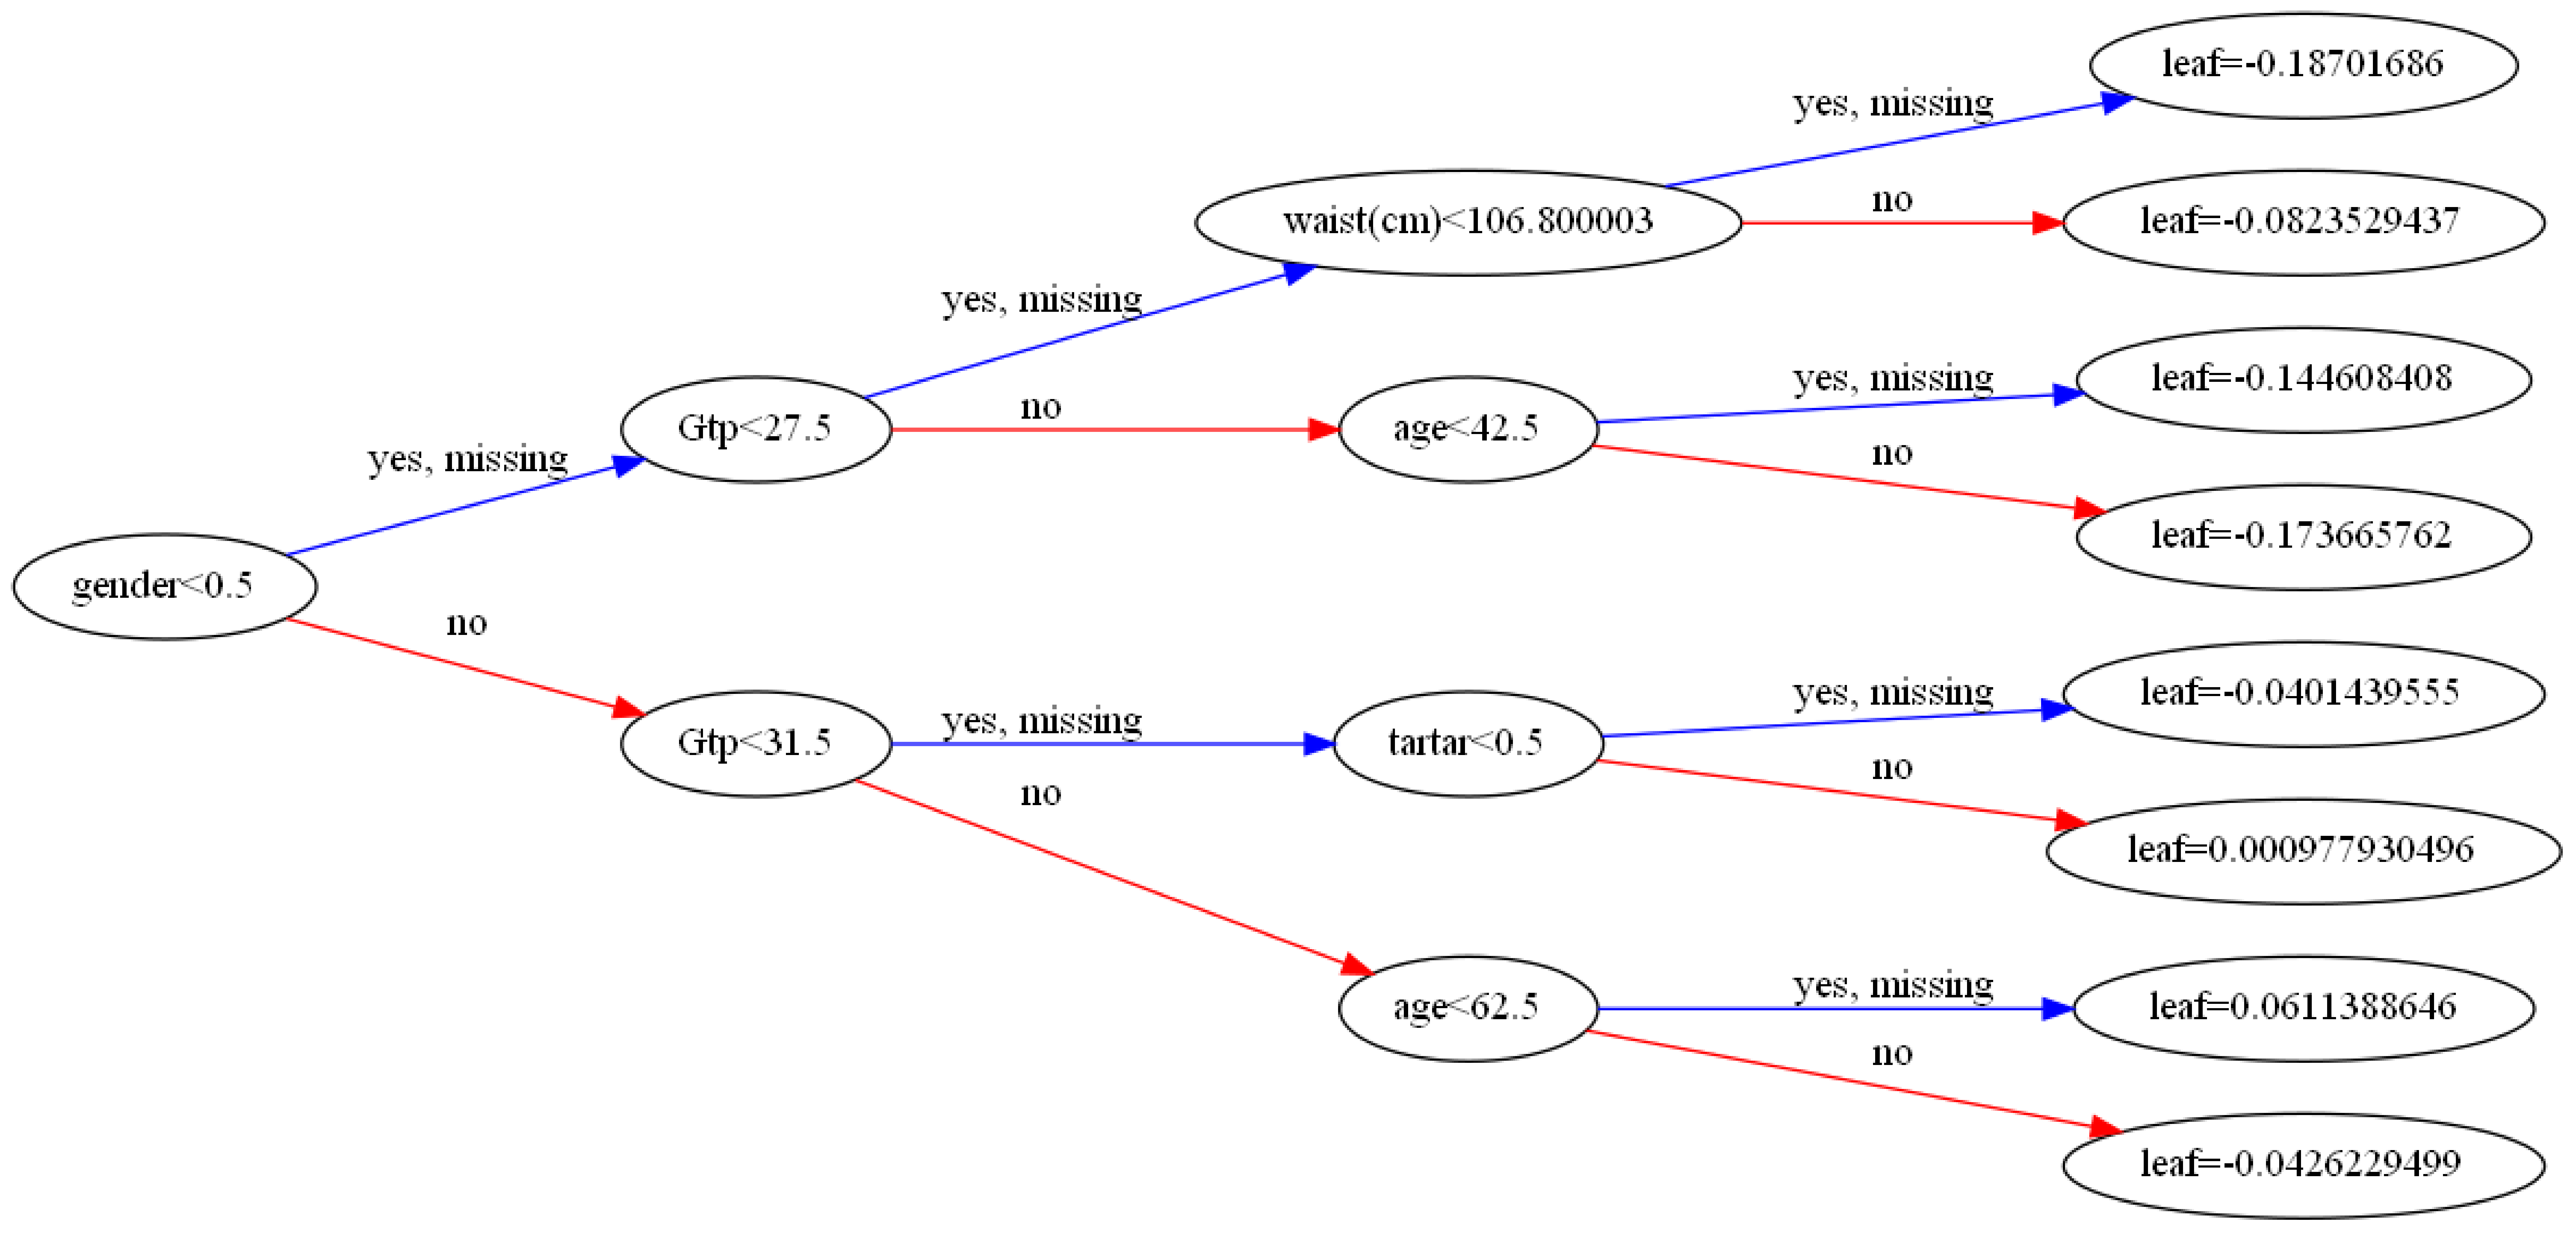

In [73]:
# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_clf, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('xgb_tree_skl_wp.png')

plt.show()

#### 2.2.2 Grid Search를 이용한 최적 하이퍼 파라미터 탐색

**n_estimator,max_depth,min_child_weight**

In [135]:
from sklearn.model_selection import GridSearchCV
# xgb 모델 생성
xgb_clf = XGBClassifier(learning_rate=0.1, 
                        n_estimators=50,
                        gamma=0, 
                        subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                        colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                        objective= 'binary:logistic', 
                        verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'max_depth':[3,6,9,12], 
              'min_child_weight':[1,3,5]
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred))) # max_depth : 6, min_child_weight : 1
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 55.4 sec

{'max_depth': 6, 'min_child_weight': 1}
분류 결과 : 0.8 
XGB 수행 시간: 55.4 초 


In [77]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=100,
                    gamma=0, 
                    subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    objective= 'binary:logistic', 
                    verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 93.8 sec

{'max_depth': 6, 'min_child_weight': 5}
분류 결과 : 0.8 
XGB 수행 시간: 93.8 초 


In [81]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=150,
                    gamma=0, 
                    subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    objective= 'binary:logistic', 
                    verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 93.8 sec

{'max_depth': 3, 'min_child_weight': 5}
분류 결과 : 0.8 
XGB 수행 시간: 145.9 초 


In [79]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=200,
                    gamma=0, 
                    subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    objective= 'binary:logistic', 
                    verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 186.3 sec

{'max_depth': 3, 'min_child_weight': 1}
분류 결과 : 0.8 
XGB 수행 시간: 186.3 초 


In [75]:
xgb_clf = XGBClassifier(learning_rate=0.1, 
                    n_estimators=1000,
                    gamma=0, 
                    subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                    objective= 'binary:logistic', 
                    verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'max_depth':range(3,13,3), 
              'min_child_weight':range(1,6,2)
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf = GridSearchCV(xgb_clf,xgb_params,scoring='accuracy',cv=5)
grid_clf.fit(x_train, y_train)
print(grid_clf.best_params_)
grid_pred = grid_clf.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 840.7 sec

{'max_depth': 3, 'min_child_weight': 1}
분류 결과 : 0.8 
XGB 수행 시간: 840.7 초 


**gamma**

In [83]:
xgb_clf_1 = XGBClassifier(learning_rate=0.1, 
                          n_estimators=100,
                          max_depth=6,
                          min_child_weight=5,
                          gamma=0, 
                          subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                          colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                          objective= 'binary:logistic', 
                          verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'gamma':[i/10.0 for i in range(0,5)]
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf_1 = GridSearchCV(xgb_clf_1,xgb_params,scoring='accuracy',cv=5)
grid_clf_1.fit(x_train, y_train)
print(grid_clf_1.best_params_)
grid_pred_1 = grid_clf_1.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred_1))) # gamma : 0.0
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 32.0 sec

{'gamma': 0.0}
분류 결과 : 0.8 
XGB 수행 시간: 32.0 초 


**subsample, colsample_bytree**

In [85]:
xgb_clf_2 = XGBClassifier(learning_rate=0.1, 
                          n_estimators=100,
                          max_depth=6,
                          min_child_weight=5,
                          gamma=0, 
                          subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                          colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                          objective= 'binary:logistic', 
                          verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(6,10)]
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf_2 = GridSearchCV(xgb_clf_2,xgb_params,scoring='accuracy',cv=5)
grid_clf_2.fit(x_train, y_train)
print(grid_clf_2.best_params_)
grid_pred_2 = grid_clf_2.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred_2))) # colsample_bytree : 0.8, subsample : 0.8
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 92.1 sec

{'colsample_bytree': 0.8, 'subsample': 0.8}
분류 결과 : 0.8 
XGB 수행 시간: 92.1 초 


In [87]:
xgb_clf_3 = XGBClassifier(learning_rate=0.1, 
                          n_estimators=100,
                          max_depth=6,
                          min_child_weight=5,
                          gamma=0.4, 
                          subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                          colsample_bytree=0.8, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                          objective= 'binary:logistic', 
                          verbose=10)

# parameter 들을 dictionary 형태로 설정
xgb_params = { 
              'colsample_bytree':[i/10.0 for i in range(6,10)]
             }

start = time.time()
# GridSearch를 통해 최적 hyperparameter를 검색
grid_clf_3 = GridSearchCV(xgb_clf_3,xgb_params,scoring='accuracy',cv=5)
grid_clf_3.fit(x_train, y_train)
print(grid_clf_3.best_params_)
grid_pred_3 = grid_clf_3.predict(x_test)
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,grid_pred_3)))
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start))

{'colsample_bytree': 0.9}
분류 결과 : 0.8 
XGB 수행 시간: 24.3 초 


**Tuning 결과**

In [90]:
# Train the model
start = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1, 
                        n_estimators=1000,
                        max_depth=6,
                        min_child_weight=5,
                        gamma=0, 
                        subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                        colsample_bytree=0.9, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                        objective= 'binary:logistic', 
                        verbose=10).fit(x_train,y_train)
# Make prediction
xgb_pred = xgb_clf.predict(x_test)
# Get predicted probability
xgb_pred_probs = xgb_clf.predict_proba(x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,xgb_pred)))

XGB 수행 시간: 14.2 초 
분류 결과 : 0.9 


In [91]:
get_clf_eval(y_test, xgb_pred, xgb_pred_probs)

오차 행렬
[[6738  298]
 [ 310 3793]]
정확도: 0.9454, 정밀도: 0.9272, 재현율: 0.9244,    F1: 0.9258, AUC:0.9867


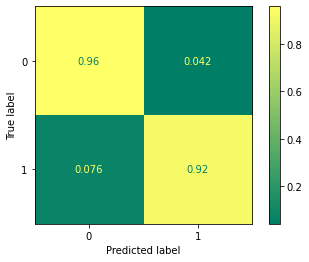

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf, x_test, y_test, cmap = 'summer', normalize = "true")

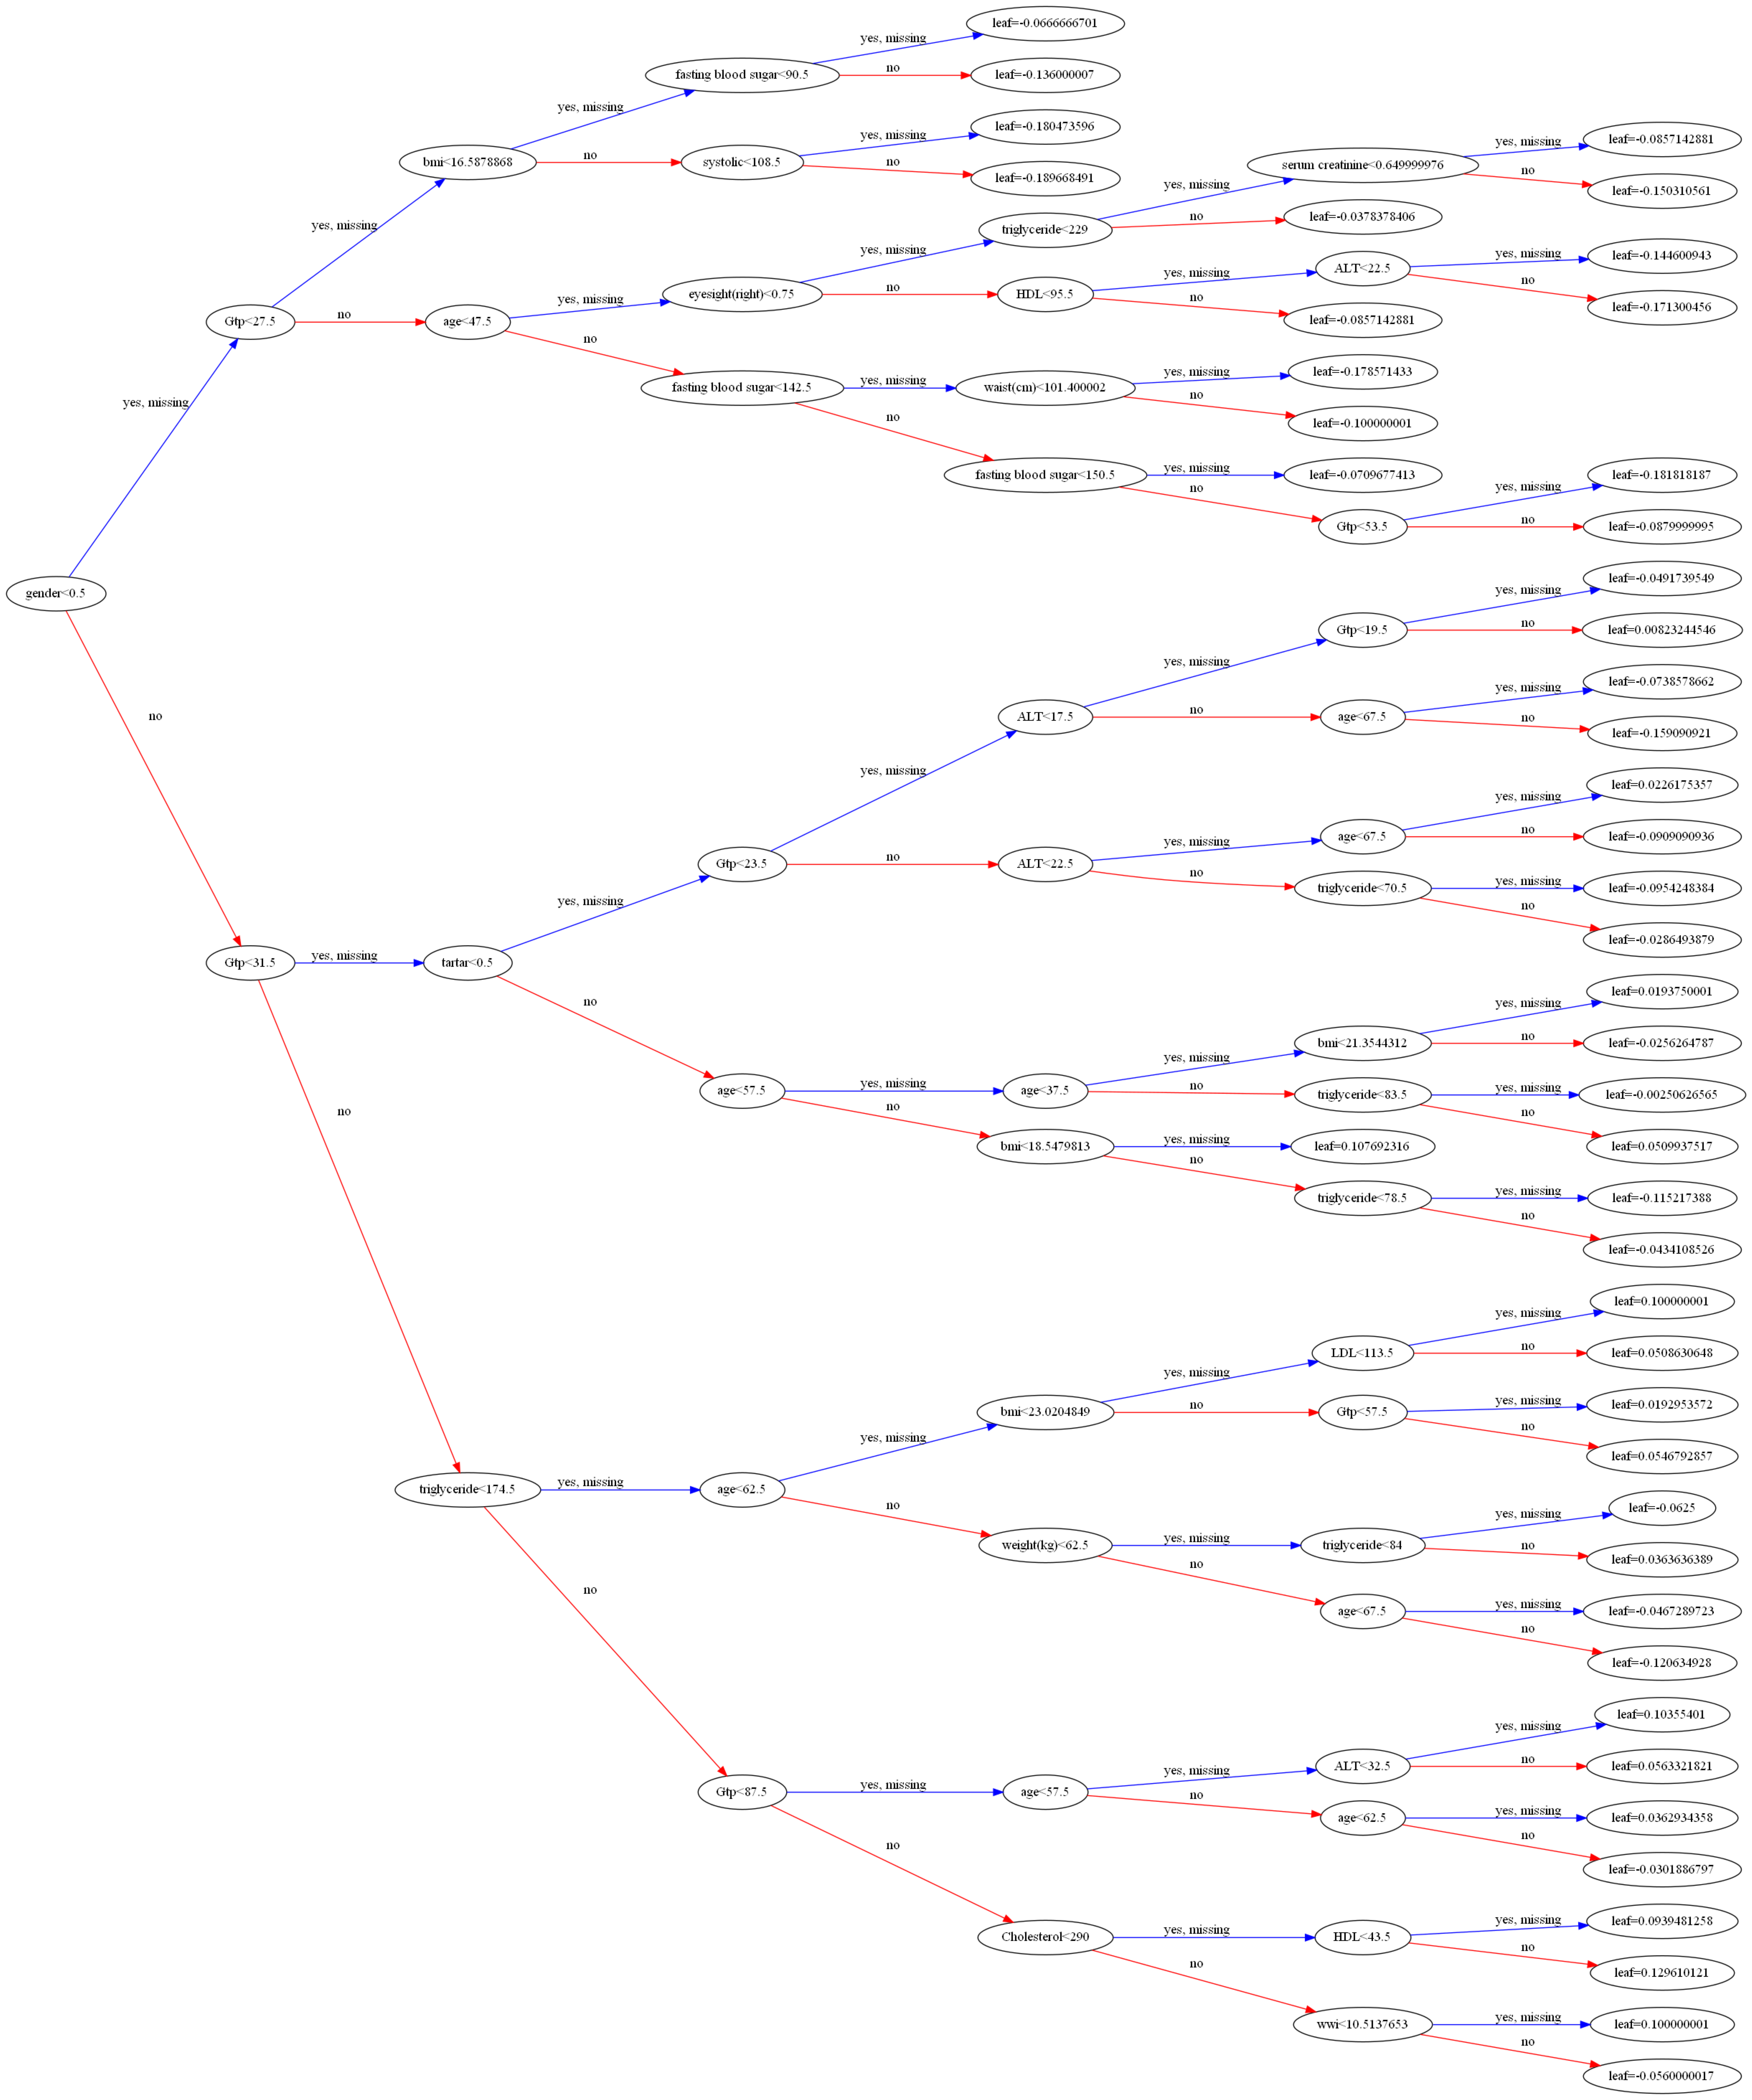

In [93]:
import xgboost as xgb

# num_trees : 그림을 여러개 그릴시 그림 번호
# rankdir : 트리의 방향, 디폴트는 위아래 방향
# rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
xgb.plot_tree(xgb_clf, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 100)

# 이미지 저장하고 싶다면
# fig.savefig('xgb_clf_tree.png')

plt.show()

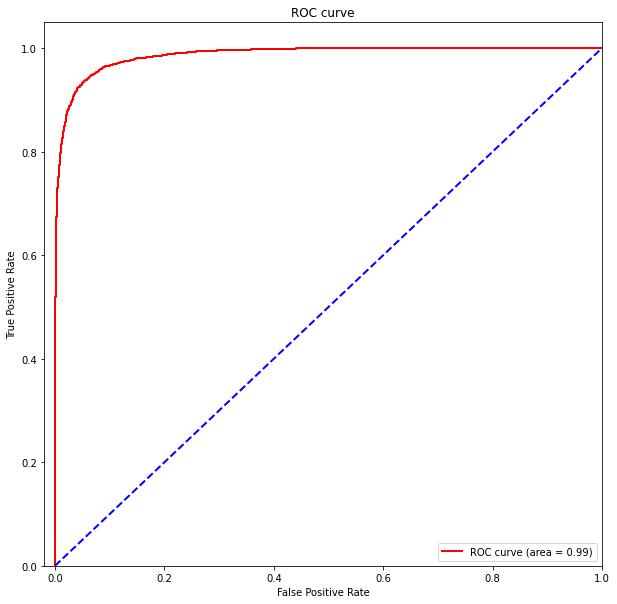

In [94]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## 3. Scaler 별 결과 비교

In [100]:
std_x_train, std_x_test = scaling(x_train, x_test, 'StandardScaler()')

In [101]:
rbt_x_train, rbt_x_test = scaling(x_train, x_test, 'RobustScaler()')

In [102]:
log_x_train, log_x_test = scaling(x_train, x_test, 'logScaler')

In [103]:
mmx_x_train, mmx_x_test = scaling(x_train, x_test)

In [104]:
# Train the model
start = time.time()
std_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            colsample_bytree=0.9, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            objective= 'binary:logistic', 
                            verbose=10).fit(std_x_train,y_train)
# Make prediction
std_xgb_pred = std_xgb_clf.predict(std_x_test)
# Get predicted probability
std_xgb_pred_probs = std_xgb_clf.predict_proba(std_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 15.1 sec
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,std_xgb_pred)))

XGB 수행 시간: 15.1 초 
분류 결과 : 0.9 


In [105]:
get_clf_eval(y_test, std_xgb_pred, std_xgb_pred_probs)

오차 행렬
[[6727  309]
 [ 326 3777]]
정확도: 0.9430, 정밀도: 0.9244, 재현율: 0.9205,    F1: 0.9225, AUC:0.9861


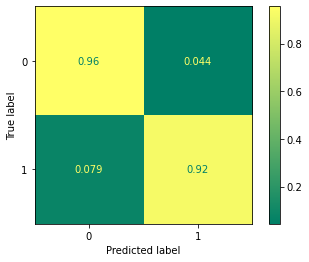

In [106]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(std_xgb_clf, std_x_test, y_test, cmap = 'summer', normalize = "true")

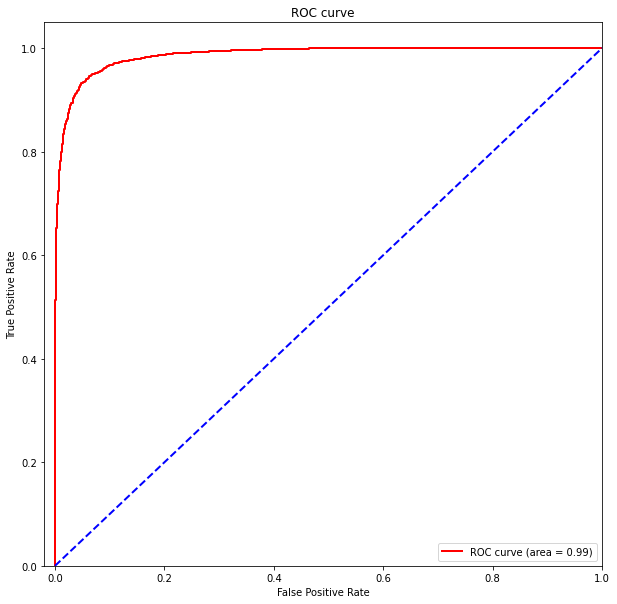

In [107]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, std_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [108]:
# Train the model
start = time.time()
rbt_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            colsample_bytree=0.9, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            objective= 'binary:logistic', 
                            verbose=10).fit(rbt_x_train,y_train)
# Make prediction
rbt_xgb_pred = rbt_xgb_clf.predict(rbt_x_test)
# Get predicted probability
rbt_xgb_pred_probs = rbt_xgb_clf.predict_proba(rbt_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,rbt_xgb_pred)))

XGB 수행 시간: 14.5 초 
분류 결과 : 0.9 


In [109]:
get_clf_eval(y_test, rbt_xgb_pred, rbt_xgb_pred_probs)

오차 행렬
[[6741  295]
 [ 324 3779]]
정확도: 0.9444, 정밀도: 0.9276, 재현율: 0.9210,    F1: 0.9243, AUC:0.9870


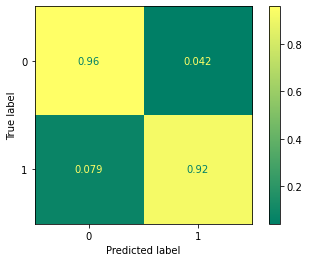

In [110]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rbt_xgb_clf, rbt_x_test, y_test, cmap = 'summer', normalize = "true")

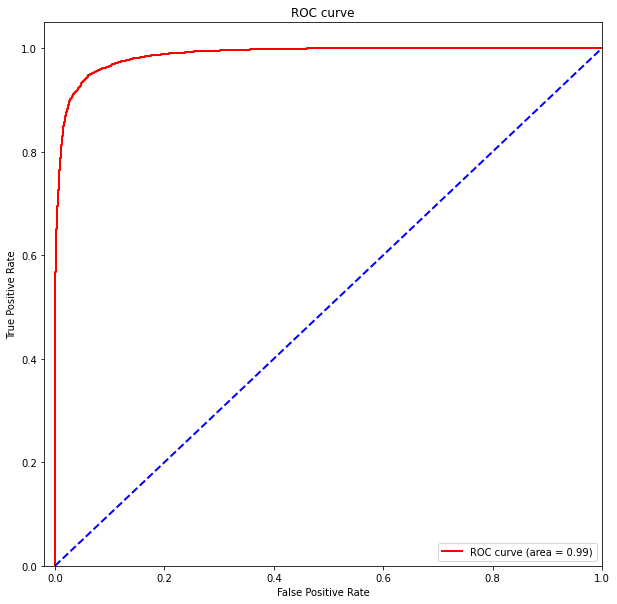

In [111]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, rbt_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [112]:
# Train the model
start = time.time()
mmx_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            colsample_bytree=0.9, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            objective= 'binary:logistic', 
                            verbose=10).fit(mmx_x_train,y_train)
# Make prediction
mmx_xgb_pred = mmx_xgb_clf.predict(mmx_x_test)
# Get predicted probability
mmx_xgb_pred_probs = mmx_xgb_clf.predict_proba(mmx_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,mmx_xgb_pred)))

XGB 수행 시간: 15.4 초 
분류 결과 : 0.9 


In [113]:
get_clf_eval(y_test, mmx_xgb_pred, mmx_xgb_pred_probs)

오차 행렬
[[6755  281]
 [ 295 3808]]
정확도: 0.9483, 정밀도: 0.9313, 재현율: 0.9281,    F1: 0.9297, AUC:0.9870


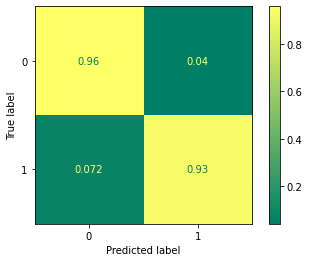

In [114]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mmx_xgb_clf, mmx_x_test, y_test, cmap = 'summer', normalize = "true")

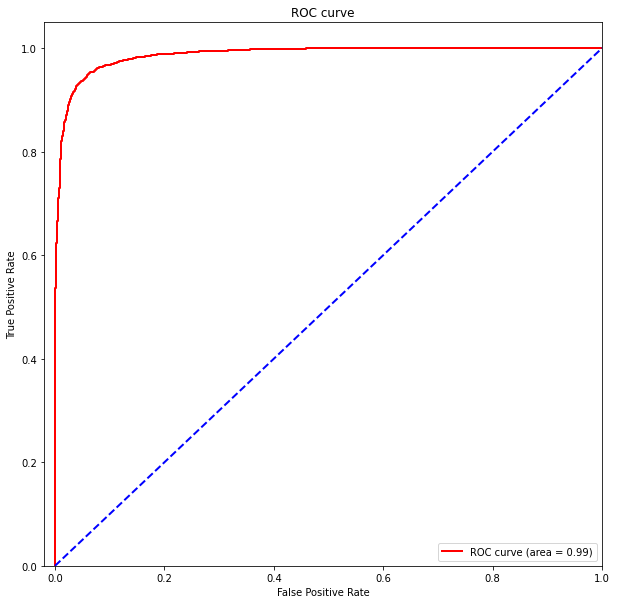

In [115]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, mmx_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [116]:
# Train the model
start = time.time()
log_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            colsample_bytree=0.9, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            objective= 'binary:logistic', 
                            verbose=10).fit(log_x_train,y_train)
# Make prediction
log_xgb_pred = log_xgb_clf.predict(log_x_test)
# Get predicted probability
log_xgb_pred_probs = log_xgb_clf.predict_proba(log_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(y_test,log_xgb_pred)))

XGB 수행 시간: 15.1 초 
분류 결과 : 0.9 


In [117]:
get_clf_eval(y_test, log_xgb_pred, log_xgb_pred_probs)

오차 행렬
[[6723  313]
 [ 306 3797]]
정확도: 0.9444, 정밀도: 0.9238, 재현율: 0.9254,    F1: 0.9246, AUC:0.9867


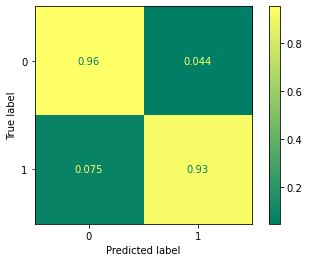

In [118]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_xgb_clf, log_x_test, y_test, cmap = 'summer', normalize = "true")

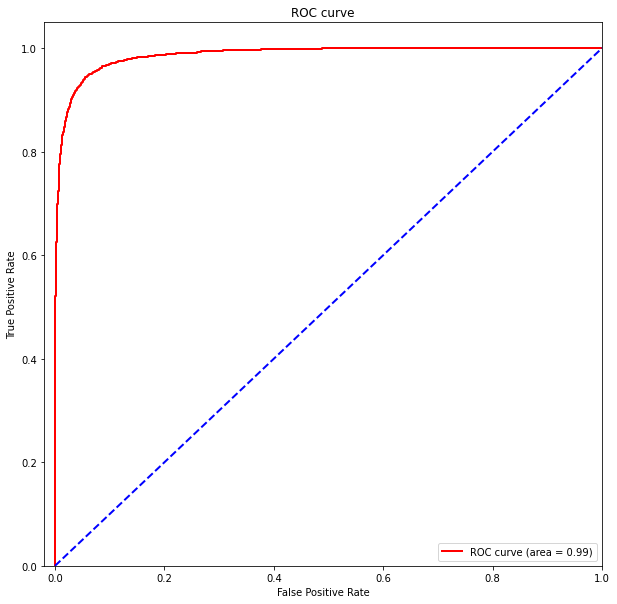

In [119]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test.values, log_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## 4. 이상값(Outlier) 관측 및 제거 후 결과 비교

**Competition Format**

In [10]:
# competition_format
x_train = pd.read_csv('../data/Smoking_raw/competition_format/x_train.csv')
x_test = pd.read_csv('../data/Smoking_raw/competition_format/x_test.csv')
y_train = pd.read_csv('../data/Smoking_raw/competition_format/y_train.csv')
y_test = pd.read_csv('../data/Smoking_raw/competition_format/y_test.csv')

In [11]:
x_train = preprocessing(x_train)
x_test = preprocessing(x_test)
y_train = preprocessing(y_train) # remove 'ID', 'oral' columns
y_test = preprocessing(y_test) # remove 'ID', 'oral' columns

**Outlier detection with IQR**

In [15]:
import numpy as np

def outliers(data):
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [25]:
def remove_outliers(x, y):
    outlier_index = []
    for col in x.columns:
        outlier_index_tmp = outliers(x[col])[0]
        outlier_index = np.concatenate((outlier_index,outlier_index_tmp),axis=None)


    d_out_index = []
    for i in x.index:
        if i in outlier_index:
            d_out_index.append(i)

    d_out_x = x.loc[d_out_index]
    d_out_x = d_out_x.reset_index(drop=True)
    
    d_out_y = y.loc[d_out_index]
    d_out_y = d_out_y.reset_index(drop=True)
    return d_out_x, d_out_y

In [27]:
d_out_x_train, d_out_y_train = remove_outliers(x_train, y_train)
d_out_x_test, d_out_y_test = remove_outliers(x_test, y_test)

smoking
0            0
1            0
2            1
3            0
4            0
...        ...
23083        0
23084        1
23085        1
23086        0
23087        1

[23088 rows x 1 columns]

**Python wrapper**

In [31]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# adjusting data into DMatirx type
dtrain = xgb.DMatrix(data=d_out_x_train,label=d_out_y_train,feature_names=d_out_x_train.columns)
dtest = xgb.DMatrix(data=d_out_x_test,label=d_out_y_test,feature_names=d_out_x_train.columns)

# list for each num_rounds
xgb_check = []

params = {'eta':0.1, # XGBClassifier일 경우 learning_rate 로 쓴다
          'objective':'binary:logistic', #목적함수 : 0 or 1 이므로 이진 로지스틱 사용
          'eval_metric':'logloss', # 오류 함수의 평가 성능 지표 : logloss
          'early_stoppings':100, #100회이상 시행시에도 오류가 내려가지않으면 중단
          'silent' : 0,
          'verbosity':0} # 트리 깊이 최대 3 , 학습률 0.1 , 

num_rounds = 1000 # default : 100

# after deleting outlier data

wlist = [(dtrain,'train'),(dtest,'eval')]
start = time.time()
xgb_model = xgb.train(params = params, dtrain=dtrain,num_boost_round= num_rounds,
                      early_stopping_rounds=100,evals = wlist)
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 29.1 sec
d_out_pred_probs = xgb_model.predict(dtest)
d_out_preds = [1 if x > 0.5 else 0 for x in d_out_pred_probs]
print('분류 결과 : {0:.1f} '.format(accuracy_score(d_out_y_test,d_out_preds)))

[0]	train-logloss:0.65959	eval-logloss:0.65828
[1]	train-logloss:0.63193	eval-logloss:0.62956
[2]	train-logloss:0.60859	eval-logloss:0.60500
[3]	train-logloss:0.58895	eval-logloss:0.58451
[4]	train-logloss:0.57164	eval-logloss:0.56636
[5]	train-logloss:0.55686	eval-logloss:0.55078
[6]	train-logloss:0.54401	eval-logloss:0.53730
[7]	train-logloss:0.53299	eval-logloss:0.52548
[8]	train-logloss:0.52301	eval-logloss:0.51510
[9]	train-logloss:0.51435	eval-logloss:0.50604
[10]	train-logloss:0.50675	eval-logloss:0.49805
[11]	train-logloss:0.49985	eval-logloss:0.49087
[12]	train-logloss:0.49360	eval-logloss:0.48411
[13]	train-logloss:0.48786	eval-logloss:0.47809
[14]	train-logloss:0.48297	eval-logloss:0.47301
[15]	train-logloss:0.47836	eval-logloss:0.46803
[16]	train-logloss:0.47423	eval-logloss:0.46358
[17]	train-logloss:0.47066	eval-logloss:0.45958
[18]	train-logloss:0.46722	eval-logloss:0.45602
[19]	train-logloss:0.46409	eval-logloss:0.45271
[20]	train-logloss:0.46117	eval-logloss:0.44987
[2

[170]	train-logloss:0.35409	eval-logloss:0.34634
[171]	train-logloss:0.35387	eval-logloss:0.34616
[172]	train-logloss:0.35367	eval-logloss:0.34592
[173]	train-logloss:0.35322	eval-logloss:0.34547
[174]	train-logloss:0.35299	eval-logloss:0.34521
[175]	train-logloss:0.35281	eval-logloss:0.34503
[176]	train-logloss:0.35233	eval-logloss:0.34464
[177]	train-logloss:0.35156	eval-logloss:0.34392
[178]	train-logloss:0.35084	eval-logloss:0.34325
[179]	train-logloss:0.35061	eval-logloss:0.34304
[180]	train-logloss:0.35039	eval-logloss:0.34280
[181]	train-logloss:0.35019	eval-logloss:0.34260
[182]	train-logloss:0.34998	eval-logloss:0.34234
[183]	train-logloss:0.34946	eval-logloss:0.34191
[184]	train-logloss:0.34875	eval-logloss:0.34111
[185]	train-logloss:0.34836	eval-logloss:0.34085
[186]	train-logloss:0.34777	eval-logloss:0.34039
[187]	train-logloss:0.34752	eval-logloss:0.34024
[188]	train-logloss:0.34731	eval-logloss:0.34010
[189]	train-logloss:0.34725	eval-logloss:0.34002
[190]	train-logloss:

[338]	train-logloss:0.29524	eval-logloss:0.29025
[339]	train-logloss:0.29489	eval-logloss:0.28995
[340]	train-logloss:0.29426	eval-logloss:0.28929
[341]	train-logloss:0.29363	eval-logloss:0.28874
[342]	train-logloss:0.29346	eval-logloss:0.28858
[343]	train-logloss:0.29338	eval-logloss:0.28848
[344]	train-logloss:0.29323	eval-logloss:0.28829
[345]	train-logloss:0.29269	eval-logloss:0.28780
[346]	train-logloss:0.29218	eval-logloss:0.28726
[347]	train-logloss:0.29179	eval-logloss:0.28684
[348]	train-logloss:0.29115	eval-logloss:0.28623
[349]	train-logloss:0.29050	eval-logloss:0.28569
[350]	train-logloss:0.28980	eval-logloss:0.28504
[351]	train-logloss:0.28929	eval-logloss:0.28450
[352]	train-logloss:0.28908	eval-logloss:0.28427
[353]	train-logloss:0.28875	eval-logloss:0.28400
[354]	train-logloss:0.28832	eval-logloss:0.28349
[355]	train-logloss:0.28806	eval-logloss:0.28324
[356]	train-logloss:0.28744	eval-logloss:0.28272
[357]	train-logloss:0.28703	eval-logloss:0.28236
[358]	train-logloss:

[506]	train-logloss:0.24316	eval-logloss:0.24089
[507]	train-logloss:0.24273	eval-logloss:0.24048
[508]	train-logloss:0.24229	eval-logloss:0.24010
[509]	train-logloss:0.24227	eval-logloss:0.24009
[510]	train-logloss:0.24222	eval-logloss:0.24005
[511]	train-logloss:0.24220	eval-logloss:0.24004
[512]	train-logloss:0.24193	eval-logloss:0.23972
[513]	train-logloss:0.24183	eval-logloss:0.23964
[514]	train-logloss:0.24145	eval-logloss:0.23927
[515]	train-logloss:0.24106	eval-logloss:0.23895
[516]	train-logloss:0.24058	eval-logloss:0.23850
[517]	train-logloss:0.24012	eval-logloss:0.23806
[518]	train-logloss:0.24008	eval-logloss:0.23803
[519]	train-logloss:0.23966	eval-logloss:0.23766
[520]	train-logloss:0.23963	eval-logloss:0.23764
[521]	train-logloss:0.23952	eval-logloss:0.23755
[522]	train-logloss:0.23949	eval-logloss:0.23752
[523]	train-logloss:0.23925	eval-logloss:0.23734
[524]	train-logloss:0.23868	eval-logloss:0.23680
[525]	train-logloss:0.23862	eval-logloss:0.23674
[526]	train-logloss:

[674]	train-logloss:0.20086	eval-logloss:0.20053
[675]	train-logloss:0.20059	eval-logloss:0.20026
[676]	train-logloss:0.20001	eval-logloss:0.19971
[677]	train-logloss:0.19958	eval-logloss:0.19930
[678]	train-logloss:0.19928	eval-logloss:0.19907
[679]	train-logloss:0.19909	eval-logloss:0.19895
[680]	train-logloss:0.19871	eval-logloss:0.19857
[681]	train-logloss:0.19851	eval-logloss:0.19834
[682]	train-logloss:0.19837	eval-logloss:0.19820
[683]	train-logloss:0.19827	eval-logloss:0.19811
[684]	train-logloss:0.19824	eval-logloss:0.19806
[685]	train-logloss:0.19805	eval-logloss:0.19791
[686]	train-logloss:0.19780	eval-logloss:0.19767
[687]	train-logloss:0.19767	eval-logloss:0.19756
[688]	train-logloss:0.19765	eval-logloss:0.19754
[689]	train-logloss:0.19763	eval-logloss:0.19753
[690]	train-logloss:0.19753	eval-logloss:0.19743
[691]	train-logloss:0.19743	eval-logloss:0.19734
[692]	train-logloss:0.19716	eval-logloss:0.19709
[693]	train-logloss:0.19702	eval-logloss:0.19695
[694]	train-logloss:

[842]	train-logloss:0.16439	eval-logloss:0.16534
[843]	train-logloss:0.16434	eval-logloss:0.16529
[844]	train-logloss:0.16433	eval-logloss:0.16529
[845]	train-logloss:0.16423	eval-logloss:0.16517
[846]	train-logloss:0.16399	eval-logloss:0.16497
[847]	train-logloss:0.16398	eval-logloss:0.16496
[848]	train-logloss:0.16393	eval-logloss:0.16492
[849]	train-logloss:0.16362	eval-logloss:0.16460
[850]	train-logloss:0.16340	eval-logloss:0.16434
[851]	train-logloss:0.16313	eval-logloss:0.16405
[852]	train-logloss:0.16278	eval-logloss:0.16369
[853]	train-logloss:0.16254	eval-logloss:0.16347
[854]	train-logloss:0.16226	eval-logloss:0.16316
[855]	train-logloss:0.16191	eval-logloss:0.16279
[856]	train-logloss:0.16166	eval-logloss:0.16254
[857]	train-logloss:0.16136	eval-logloss:0.16227
[858]	train-logloss:0.16114	eval-logloss:0.16201
[859]	train-logloss:0.16097	eval-logloss:0.16189
[860]	train-logloss:0.16076	eval-logloss:0.16167
[861]	train-logloss:0.16049	eval-logloss:0.16137
[862]	train-logloss:

In [32]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [33]:
get_clf_eval(d_out_y_test, d_out_preds, d_out_pred_probs)

오차 행렬
[[3365   67]
 [  22 2390]]
정확도: 0.9848, 정밀도: 0.9727, 재현율: 0.9909,    F1: 0.9817, AUC:0.9988


**Scikit-learn wrapper**

In [34]:
# Train the model
start = time.time()
d_out_xgb_clf = XGBClassifier(learning_rate=0.1, 
                            n_estimators=1000,
                            max_depth=6,
                            min_child_weight=5,
                            gamma=0, 
                            subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            colsample_bytree=0.9, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                            objective= 'binary:logistic', 
                            verbose=10).fit(d_out_x_train,d_out_y_train)
# Make prediction
d_out_xgb_pred = d_out_xgb_clf.predict(d_out_x_test)
# Get predicted probability
d_out_xgb_pred_probs = d_out_xgb_clf.predict_proba(d_out_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(d_out_y_test,d_out_xgb_pred)))

XGB 수행 시간: 6.1 초 
분류 결과 : 1.0 


In [35]:
get_clf_eval(d_out_y_test, d_out_xgb_pred, d_out_xgb_pred_probs)

오차 행렬
[[3373   59]
 [  32 2380]]
정확도: 0.9844, 정밀도: 0.9758, 재현율: 0.9867,    F1: 0.9812, AUC:0.9981


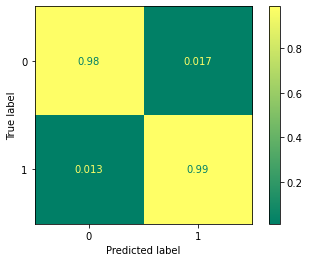

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(d_out_xgb_clf, d_out_x_test, d_out_y_test, cmap = 'summer', normalize = "true")

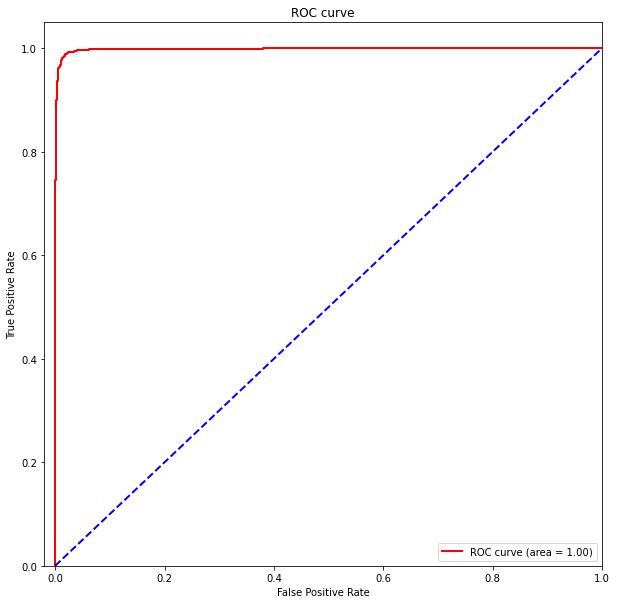

In [37]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(d_out_y_test.values, d_out_xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

## 5. 최종 모델 생성

In [11]:
def outliers(data):
    Q1, Q3 = np.percentile(data, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [12]:
def remove_outliers(x, y):
    outlier_index = []
    for col in x.columns:
        outlier_index_tmp = outliers(x[col])[0]
        outlier_index = np.concatenate((outlier_index,outlier_index_tmp),axis=None)

    d_out_index = []
    for i in x.index:
        if i in outlier_index:
            d_out_index.append(i)

    d_out_x = x.loc[d_out_index]
    d_out_x = d_out_x.reset_index(drop=True)
    
    d_out_y = y.loc[d_out_index]
    d_out_y = d_out_y.reset_index(drop=True)
    return d_out_x, d_out_y

In [13]:
mmx_x_train, mmx_x_test = scaling(x_train, x_test)

In [14]:
f_x_train,f_y_train = remove_outliers(mmx_x_train, y_train)
f_x_test,f_y_test = remove_outliers(mmx_x_test, y_test)

In [15]:
# Train the model
start = time.time()
xgb_clf = XGBClassifier(learning_rate=0.1, 
                        n_estimators=1000,
                        max_depth=6,
                        min_child_weight=5,
                        gamma=0, 
                        subsample=0.8, # 각 트리마다의 관측 데이터 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                        colsample_bytree=0.9, # 각 트리마다의 feature 샘플링 비율, default = 1, 일반적으로 0.5 ~ 1
                        objective= 'binary:logistic', 
                        verbose=10).fit(f_x_train,f_y_train)
# Make prediction
xgb_pred = xgb_clf.predict(f_x_test)
# Get predicted probability
xgb_pred_probs = xgb_clf.predict_proba(f_x_test)[:,1]
end = time.time()
print("XGB 수행 시간: {0:.1f} 초 ".format(end - start)) # 
print('분류 결과 : {0:.1f} '.format(accuracy_score(f_y_test,xgb_pred)))

[11:33:20] WARNING: ..\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:33:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB 수행 시간: 7.1 초 
분류 결과 : 1.0 


In [17]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
get_clf_eval(f_y_test, xgb_pred, xgb_pred_probs)

오차 행렬
[[3394   63]
 [  32 2394]]
정확도: 0.9839, 정밀도: 0.9744, 재현율: 0.9868,    F1: 0.9805, AUC:0.9989


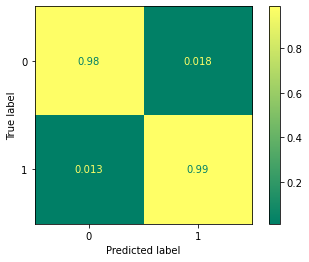

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_clf, f_x_test, f_y_test, cmap = 'summer', normalize = "true")

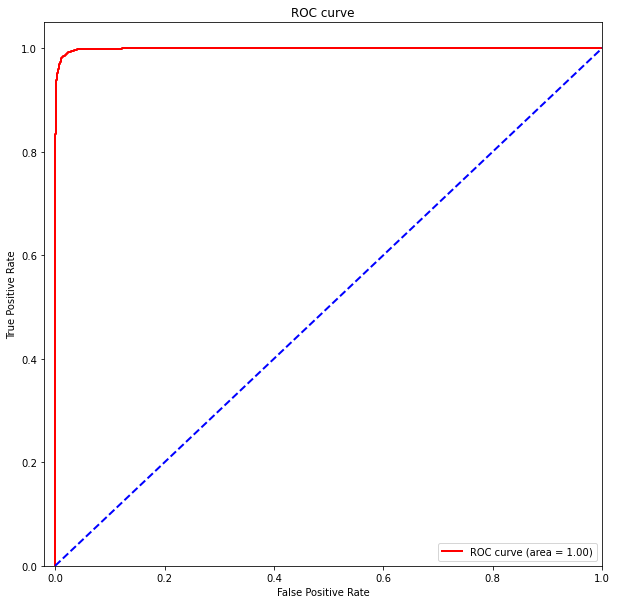

In [19]:
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(f_y_test.values, xgb_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()